In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("merged_dataset.csv")

In [3]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,stationery


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   customer_unique_id             113425 non-null  object 
 9   customer_zip_code_prefix       113425 non-null  int64  
 10  customer_city                  113425 non-null  object 
 11  customer_state                 113425 non-null  object 
 12  order_item_id                 

In [5]:
df.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_c

In [6]:
# Convert date columns to datetime format
date_cols = [
    "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
    "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date"
]
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

# Convert order_item_id to integer (if no missing values)
df["order_item_id"] = df["order_item_id"].fillna(0).astype(int)


In [7]:
df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int32
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              

In [8]:
print(df.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                 2378
product_length_cm                2378
product_height_cm                2378
product_width_cm                 2378
seller_zip_c

In [9]:
# Drop all rows that contain any null values
df_cleaned = df.dropna()

# Reset index after dropping rows
df_cleaned.reset_index(drop=True, inplace=True)

# Check if all null values are removed
print(df_cleaned.isnull().sum())  

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state        

In [10]:
# Create a new column 'late_delivery'
df_cleaned["late_delivery"] = df_cleaned["order_delivered_customer_date"] > df_cleaned["order_estimated_delivery_date"]

# Convert Boolean to 'Yes' or 'No'
df_cleaned["late_delivery"] = df_cleaned["late_delivery"].replace({True: "Yes", False: "No"})

# Check the first few rows
print(df_cleaned[["order_delivered_customer_date", "order_estimated_delivery_date", "late_delivery"]].head())
# Convert 'late_delivery' column to binary (1 for late, 0 for on-time)
df_cleaned["late_delivery"] = df_cleaned["late_delivery"].map({"Yes": 1, "No": 0})

  order_delivered_customer_date order_estimated_delivery_date late_delivery
0           2017-10-10 21:25:13                    2017-10-18            No
1           2018-08-07 15:27:45                    2018-08-13            No
2           2018-08-17 18:06:29                    2018-09-04            No
3           2017-12-02 00:28:42                    2017-12-15            No
4           2018-02-16 18:17:02                    2018-02-26            No


In [11]:
df_cleaned.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,late_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,pet_shop,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,stationery,0


In [12]:
df_cleaned.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int32
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              

### Temporal Features

In [13]:
df_cleaned["order_purchase_month"] = df_cleaned["order_purchase_timestamp"].dt.month
df_cleaned["order_purchase_week"] = df_cleaned["order_purchase_timestamp"].dt.week
df_cleaned["order_purchase_weekday"] = df_cleaned["order_purchase_timestamp"].dt.weekday + 1
df_cleaned["order_purchase_year"] = df_cleaned["order_purchase_timestamp"].dt.year
df_cleaned["order_purchase_dayofmonth"] = df_cleaned["order_purchase_timestamp"].dt.day


df_cleaned

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,late_delivery,order_purchase_month,order_purchase_week,order_purchase_weekday,order_purchase_year,order_purchase_dayofmonth
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,9350.0,maua,SP,housewares,0,10,40,1,2017,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,31570.0,belo horizonte,SP,perfumery,0,7,30,2,2018,24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,14840.0,guariba,SP,auto,0,8,32,3,2018,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,31842.0,belo horizonte,MG,pet_shop,0,11,46,6,2017,18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,8752.0,mogi das cruzes,SP,stationery,0,2,7,2,2018,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108617,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,17602.0,tupa,SP,baby,0,2,6,2,2018,6
108618,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,8290.0,sao paulo,SP,home_appliances_2,0,8,34,7,2017,27
108619,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,37175.0,ilicinea,MG,computers_accessories,0,1,2,1,2018,8
108620,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,37175.0,ilicinea,MG,computers_accessories,0,1,2,1,2018,8


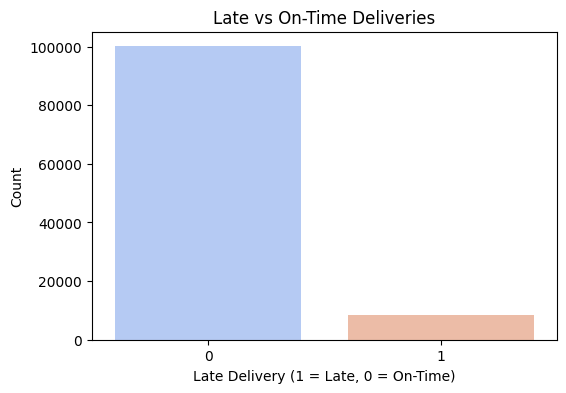

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x="late_delivery", data=df_cleaned, palette="coolwarm")
plt.title("Late vs On-Time Deliveries")
plt.xlabel("Late Delivery (1 = Late, 0 = On-Time)")
plt.ylabel("Count")
plt.show()


In [15]:
print("Total number of rows:", df_cleaned.shape[0])


Total number of rows: 108622


In [16]:
# Count the total number of unique purchases (orders)
total_purchases = df_cleaned['order_id'].nunique()

# Count the number of late deliveries (where late_delivery = 1)
late_deliveries = df_cleaned['late_delivery'].sum()

# Calculate the ratio of late deliveries to total purchases
late_delivery_ratio = late_deliveries / total_purchases

# Print the results
print(f"Total number of purchases: {total_purchases}")
print(f"Total number of late deliveries: {late_deliveries}")
print(f"Late delivery ratio: {late_delivery_ratio:.4f}")

Total number of purchases: 95111
Total number of late deliveries: 8569
Late delivery ratio: 0.0901


In [17]:
import pandas as pd

# Convert 'order_purchase_timestamp' to datetime format if not already
df_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_cleaned['order_purchase_timestamp'], errors='coerce')

# Define the months that correspond to specific holidays in Brazil
# 1. Carnival is in February (Month 2)
# 2. Independence Day is in September (Month 9)
# 3. Proclamation of the Republic is in November (Month 11)
# 4. Christmas is in December (Month 12)
# Let's consider the other holidays like Good Friday as well
holiday_months = [2, 9, 11, 12]  # Months for Carnival, Independence Day, Republic Day, and Christmas

# Flag the rows where the 'month' is in the list of holiday months
df_cleaned['is_holiday_month'] = df_cleaned['order_purchase_month'].isin(holiday_months)

# Show the updated dataframe with the 'is_holiday_month' column
df_cleaned.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,product_category_name_english,late_delivery,order_purchase_month,order_purchase_week,order_purchase_weekday,order_purchase_year,order_purchase_dayofmonth,is_holiday_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,housewares,0,10,40,1,2017,2,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,belo horizonte,SP,perfumery,0,7,30,2,2018,24,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,guariba,SP,auto,0,8,32,3,2018,8,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,belo horizonte,MG,pet_shop,0,11,46,6,2017,18,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,mogi das cruzes,SP,stationery,0,2,7,2,2018,13,True


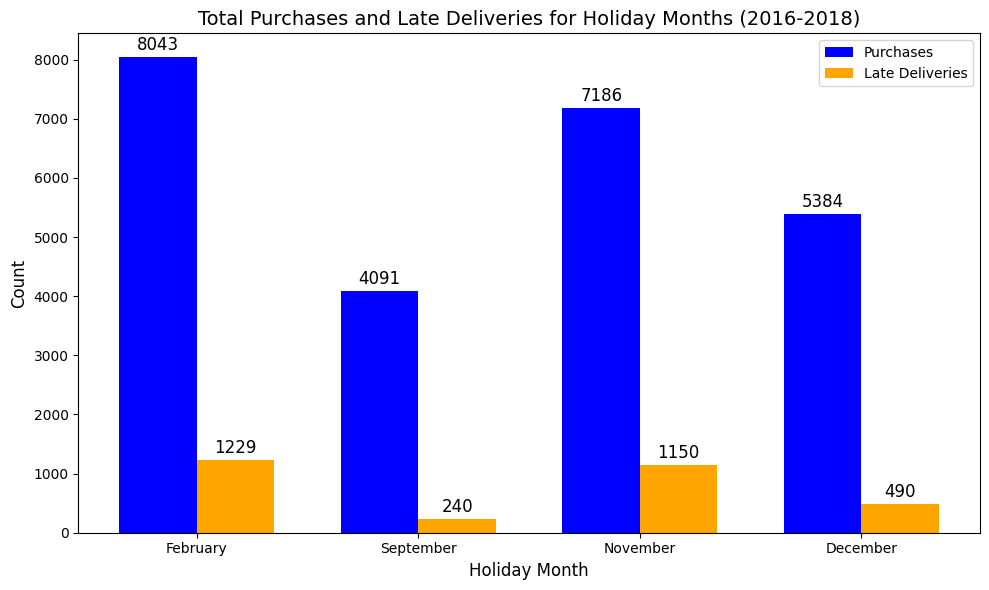

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for rows where 'is_holiday_month' is True (i.e., only holiday months)
holiday_data = df_cleaned[df_cleaned['is_holiday_month']]

# Get the unique holiday months (February, September, November, December)
holiday_months = {2: 'February', 9: 'September', 11: 'November', 12: 'December'}

# Create lists to store the values for each holiday month
months = []
purchases = []
late_deliveries = []

# Loop through each holiday month to calculate purchases and late deliveries for all years
for month, month_name in holiday_months.items():
    # Filter data for the current holiday month
    filtered_data = holiday_data[holiday_data['order_purchase_timestamp'].dt.month == month]
    
    # Calculate total purchases (unique orders) and total late deliveries
    total_purchases = filtered_data['order_id'].nunique()  # Count unique orders (purchases)
    total_late_deliveries = filtered_data['late_delivery'].sum()  # Sum of late deliveries (assuming binary 1/0)
    
    # Append the results to the lists
    months.append(month_name)
    purchases.append(total_purchases)
    late_deliveries.append(total_late_deliveries)

# Create a bar plot for the results
width = 0.35  # Width of the bars
x = range(len(months))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for purchases and late deliveries
bar1 = ax.bar(x, purchases, width, label='Purchases', color='blue')
bar2 = ax.bar([p + width for p in x], late_deliveries, width, label='Late Deliveries', color='orange')

# Add the numbers on top of the bars
for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 50, str(yval), ha='center', va='bottom', fontsize=12)

for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 50, str(yval), ha='center', va='bottom', fontsize=12)

# Add titles and labels
ax.set_title('Total Purchases and Late Deliveries for Holiday Months (2016-2018)', fontsize=14)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Holiday Month', fontsize=12)
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(months)

# Display the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

# Assuming 'df_cleaned' is your DataFrame and it has 'order_id' and 'order_item_id' columns

# Step 1: Group by 'order_id' and count the number of items (using 'order_item_id')
# Here, we assume 'order_item_id' represents each item in an order.
item_count_per_order = df_cleaned.groupby('order_id')['order_item_id'].count().reset_index(name='items_per_order')

# Step 2: Merge the item count back to the original dataframe
df_cleaned = pd.merge(df_cleaned, item_count_per_order, on='order_id', how='left')

# Step 3: Flag orders that have more than one item
df_cleaned['has_multiple_items'] = df_cleaned['items_per_order'] > 1

# Step 4: Show the updated dataframe with the flag
print(df_cleaned[['order_id', 'items_per_order', 'has_multiple_items']].head())

# Filter the DataFrame to show only the rows where 'has_multiple_items' is True
multiple_items_orders = df_cleaned[df_cleaned['has_multiple_items']]

# Display the filtered data
print(multiple_items_orders[['order_id', 'items_per_order', 'has_multiple_items']].head())

                           order_id  items_per_order  has_multiple_items
0  e481f51cbdc54678b7cc49136f2d6af7                1               False
1  53cdb2fc8bc7dce0b6741e2150273451                1               False
2  47770eb9100c2d0c44946d9cf07ec65d                1               False
3  949d5b44dbf5de918fe9c16f97b45f8a                1               False
4  ad21c59c0840e6cb83a9ceb5573f8159                1               False
                            order_id  items_per_order  has_multiple_items
9   e6ce16cb79ec1d90b1da9085a6118aeb                2                True
10  e6ce16cb79ec1d90b1da9085a6118aeb                2                True
26  acce194856392f074dbf9dada14d8d82                2                True
27  acce194856392f074dbf9dada14d8d82                2                True
52  9faeb9b2746b9d7526aef5acb08e2aa0                2                True


In [20]:
import pandas as pd

# Assuming 'df_cleaned' is your DataFrame

# Calculate the total product dimensions (length + width + height) for each item
df_cleaned['total_product_dimensions'] = df_cleaned['product_length_cm'] + df_cleaned['product_width_cm'] + df_cleaned['product_height_cm']

# Group by 'order_id' to calculate the total product dimensions for each order
order_dimensions = df_cleaned.groupby('order_id').agg(
    total_dimensions=('total_product_dimensions', 'sum')
).reset_index()

# Merge the total dimensions back into the original dataframe (optional)
df_cleaned = pd.merge(df_cleaned, order_dimensions, on='order_id', how='left')

# Drop the 'total_dimensions' column
df_cleaned = df_cleaned.drop(columns=['total_dimensions'])

# Show the first few rows of the updated dataframe with total dimensions
df_cleaned[['order_id', 'total_product_dimensions']].head()

,order_id,total_product_dimensions
0,e481f51cbdc54678b7cc49136f2d6af7,40.0
1,53cdb2fc8bc7dce0b6741e2150273451,51.0
2,47770eb9100c2d0c44946d9cf07ec65d,64.0
3,949d5b44dbf5de918fe9c16f97b45f8a,60.0
4,ad21c59c0840e6cb83a9ceb5573f8159,81.0


In [21]:
import pandas as pd

# Assuming 'df_cleaned' is your DataFrame and it has 'order_id' and 'product_weight_g' columns

# Step 1: Group by 'order_id' and calculate the total weight for each order
order_weight = df_cleaned.groupby('order_id').agg(
    total_weight=('product_weight_g', 'sum')  # Sum of weights for each order
).reset_index()

# Check the content of the 'order_weight' DataFrame before merging
print(order_weight.head())

# Step 2: Merge the total weight back into the original dataframe
df_cleaned = pd.merge(df_cleaned, order_weight, on='order_id', how='left')

# Check the columns after the merge to ensure 'total_weight' is in 'df_cleaned'
print(df_cleaned.columns)

# Step 3: Show the first few rows of the updated dataframe with total weight
print(df_cleaned[['order_id', 'product_weight_g', 'total_weight']].head())

                           order_id  total_weight
0  00010242fe8c5a6d1ba2dd792cb16214         650.0
1  00018f77f2f0320c557190d7a144bdd3       30000.0
2  000229ec398224ef6ca0657da4fc703e        3050.0
3  00024acbcdf0a6daa1e931b038114c75         200.0
4  00042b26cf59d7ce69dfabb4e55b4fd9        3750.0
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_categor

In [22]:
df_cleaned

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_purchase_month,order_purchase_week,order_purchase_weekday,order_purchase_year,order_purchase_dayofmonth,is_holiday_month,items_per_order,has_multiple_items,total_product_dimensions,total_weight
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,10,40,1,2017,2,False,1,False,40.0,500.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,7,30,2,2018,24,False,1,False,51.0,400.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,8,32,3,2018,8,False,1,False,64.0,420.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,11,46,6,2017,18,True,1,False,60.0,450.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,2,7,2,2018,13,True,1,False,81.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108617,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,2,6,2,2018,6,True,1,False,90.0,4950.0
108618,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,8,34,7,2017,27,False,1,False,144.0,13300.0
108619,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,1,2,1,2018,8,False,2,True,60.0,13100.0
108620,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,1,2,1,2018,8,False,2,True,60.0,13100.0


In [23]:
##### national major holidays - could contribute to late deliveries
#### flag for it^ 
#### flag for orders that have multiple items
### no. of items per order 
#### calculate the total prodyct dimensions for each order for items
#### maximum height but total weight   
#### check the zip codes but mention in report that its not total longitutdes and latitutdes

In [24]:
## the above one removed the individual height weight etc. 

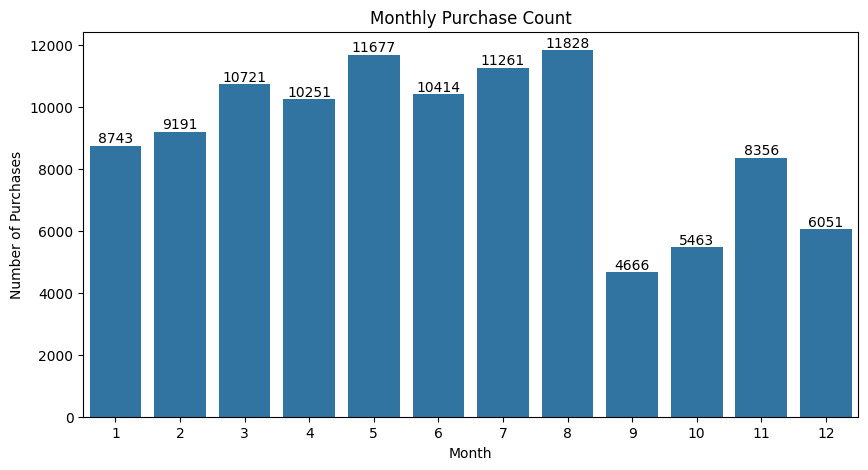

In [25]:
# Ensure order_purchase_timestamp is in datetime format
df_cleaned["order_purchase_timestamp"] = pd.to_datetime(df_cleaned["order_purchase_timestamp"])


# 1. Bar plot for monthly purchase count with values on bars (no decimals)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="order_purchase_month", data=df_cleaned, order=sorted(df_cleaned["order_purchase_month"].unique()))

# Add numbers on top of bars without decimals
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert to integer to remove decimal
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='medium')

plt.xlabel("Month")
plt.ylabel("Number of Purchases")
plt.title("Monthly Purchase Count")
plt.show()



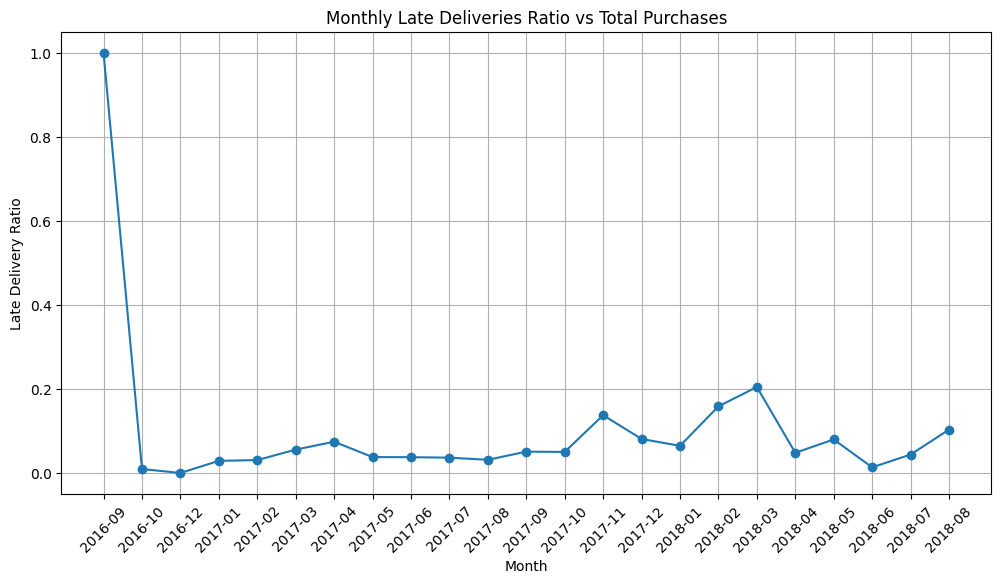

In [26]:
# Convert order purchase timestamp to datetime
df_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_cleaned['order_purchase_timestamp'])

# Extract year-month
df_cleaned['order_month'] = df_cleaned['order_purchase_timestamp'].dt.to_period('M')

# Identify late deliveries
df_cleaned['late_delivery'] = df_cleaned['order_delivered_customer_date'] > df_cleaned['order_estimated_delivery_date']

# Aggregate data
monthly_stats = df_cleaned.groupby('order_month').agg(
    total_purchases=('order_id', 'count'),
    late_deliveries=('late_delivery', 'sum')
).reset_index()

# Calculate ratio
monthly_stats['late_delivery_ratio'] = monthly_stats['late_deliveries'] / monthly_stats['total_purchases']

# Plot the ratio
plt.figure(figsize=(12, 6))
plt.plot(monthly_stats['order_month'].astype(str), monthly_stats['late_delivery_ratio'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Late Delivery Ratio")
plt.title("Monthly Late Deliveries Ratio vs Total Purchases")
plt.grid()
plt.show()


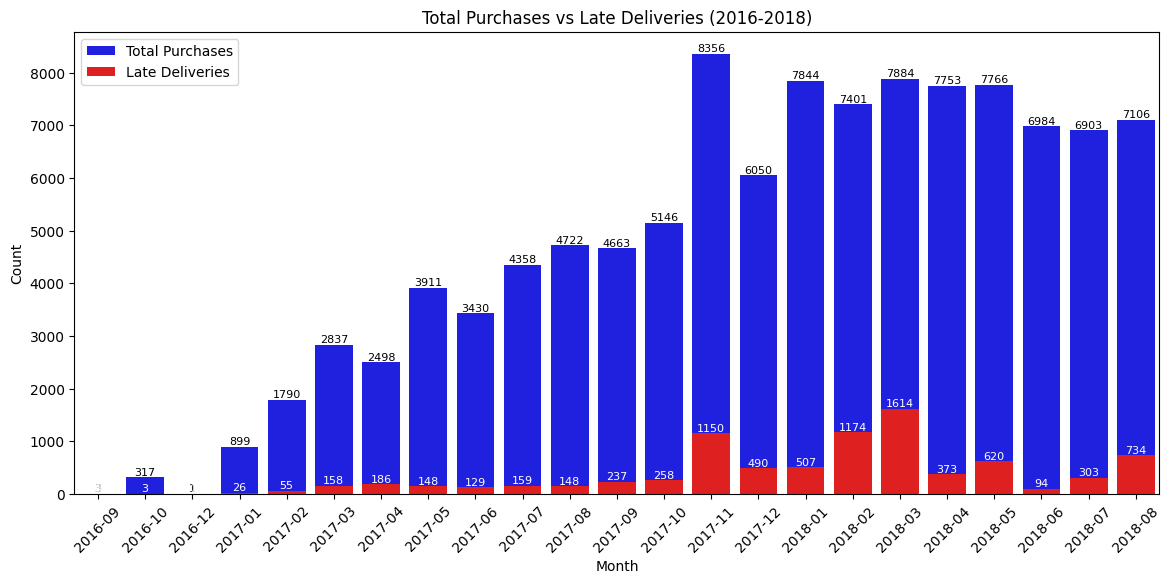

In [27]:
# Filter for 2017 and 2018
df_filtered = df_cleaned[(df_cleaned['order_purchase_timestamp'].dt.year >= 2015) & 
                         (df_cleaned['order_purchase_timestamp'].dt.year <= 2025)]

# Group by month and count purchases & late deliveries
monthly_counts = df_filtered.groupby(df_filtered['order_purchase_timestamp'].dt.to_period('M')).agg(
    total_purchases=('order_id', 'count'),
    late_deliveries=('late_delivery', 'sum')
).reset_index()

# Convert month to string for plotting
monthly_counts['order_purchase_timestamp'] = monthly_counts['order_purchase_timestamp'].astype(str)

# Plot the grouped bar chart
plt.figure(figsize=(14, 6))
bar1 = sns.barplot(x='order_purchase_timestamp', y='total_purchases', data=monthly_counts, color='blue', label="Total Purchases")
bar2 = sns.barplot(x='order_purchase_timestamp', y='late_deliveries', data=monthly_counts, color='red', label="Late Deliveries")

# Annotate the bars with their values
for i, (total, late) in enumerate(zip(monthly_counts['total_purchases'], monthly_counts['late_deliveries'])):
    plt.text(i, total, str(total), color='black', ha='center', va='bottom', fontsize=8)  # Total Purchases
    plt.text(i, late, str(late), color='white', ha='center', va='bottom', fontsize=8)    # Late Deliveries

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Total Purchases vs Late Deliveries (2016-2018)")
plt.legend()
plt.show()


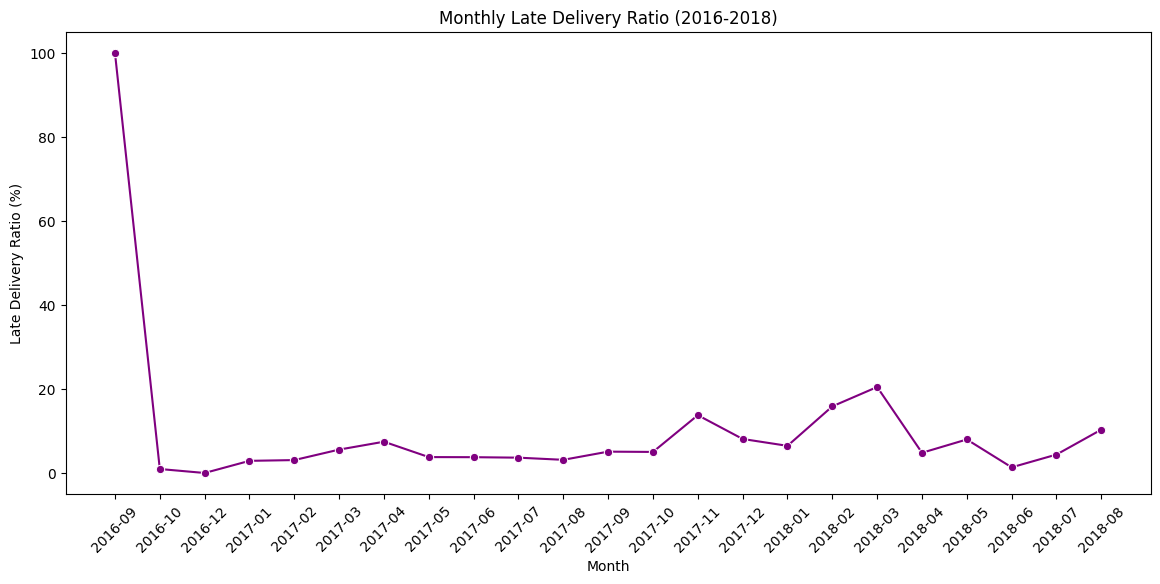

   order_purchase_timestamp  total_purchases  late_deliveries  \
0                   2016-09                3                3   
1                   2016-10              317                3   
2                   2016-12                1                0   
3                   2017-01              899               26   
4                   2017-02             1790               55   
5                   2017-03             2837              158   
6                   2017-04             2498              186   
7                   2017-05             3911              148   
8                   2017-06             3430              129   
9                   2017-07             4358              159   
10                  2017-08             4722              148   
11                  2017-09             4663              237   
12                  2017-10             5146              258   
13                  2017-11             8356             1150   
14                  2017-

In [28]:
# Filter for 2017 and 2018
df_filtered = df_cleaned[(df_cleaned['order_purchase_timestamp'].dt.year >= 2015) & 
                         (df_cleaned['order_purchase_timestamp'].dt.year <= 2025)]

# Group by month and calculate purchases, late deliveries, and the ratio
monthly_counts = df_filtered.groupby(df_filtered['order_purchase_timestamp'].dt.to_period('M')).agg(
    total_purchases=('order_id', 'count'),
    late_deliveries=('late_delivery', 'sum')
).reset_index()

# Calculate the late delivery ratio
monthly_counts['late_delivery_ratio'] = (monthly_counts['late_deliveries'] / monthly_counts['total_purchases']) * 100

# Convert month to string for plotting
monthly_counts['order_purchase_timestamp'] = monthly_counts['order_purchase_timestamp'].astype(str)

# Plot the late delivery ratio
plt.figure(figsize=(14, 6))
sns.lineplot(x='order_purchase_timestamp', y='late_delivery_ratio', data=monthly_counts, marker='o', color='purple')

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Late Delivery Ratio (%)")
plt.title("Monthly Late Delivery Ratio (2016-2018)")
plt.show()

# Display the DataFrame with ratios for inspection
print(monthly_counts[['order_purchase_timestamp', 'total_purchases', 'late_deliveries', 'late_delivery_ratio']])


In [29]:
## there is an increase in the number of purchases and late deliveries possibly due to black friday. 
## proclamation of republic day on nov 15th
## positive correlation bw purchases and late deliveries

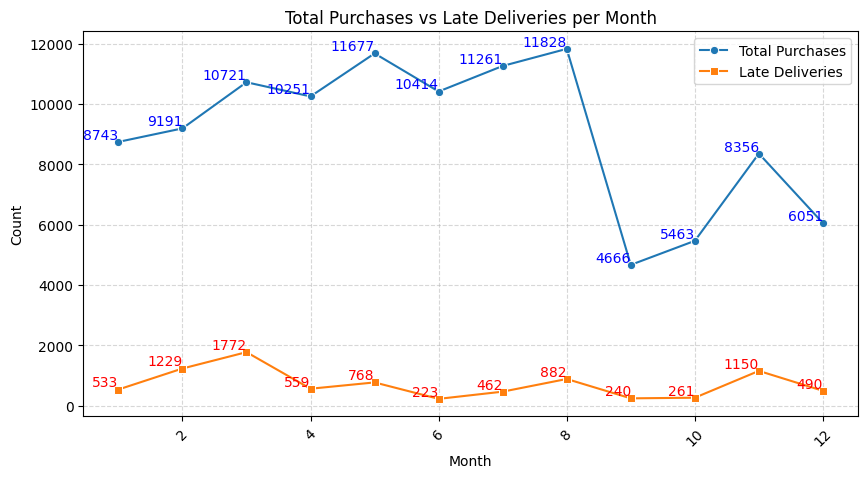

In [30]:
# Grouping data
monthly_purchases = df_cleaned.groupby("order_purchase_month")["order_id"].count()
monthly_late_deliveries = df_cleaned.groupby("order_purchase_month")["late_delivery"].sum()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_purchases.index, y=monthly_purchases.values, label="Total Purchases", marker="o")
sns.lineplot(x=monthly_late_deliveries.index, y=monthly_late_deliveries.values, label="Late Deliveries", marker="s")

# Annotating values on the plot
for x, y in zip(monthly_purchases.index, monthly_purchases.values):
    plt.text(x, y, str(y), ha='right', va='bottom', fontsize=10, color="blue")

for x, y in zip(monthly_late_deliveries.index, monthly_late_deliveries.values):
    plt.text(x, y, str(y), ha='right', va='bottom', fontsize=10, color="red")

# Labels and title
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Total Purchases vs Late Deliveries per Month")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True, linestyle="--", alpha=0.5)  # Add a light grid

# Show the plot
plt.show()
## make a graph with all three years in line plot with monthly data 

In [31]:
## There's a sharp increase in purchases from October (5,463) to November (8,356), showing a strong Black Friday effect.
## After November, purchases drop again in December (6,051), likely because many people already shopped during Black Friday.

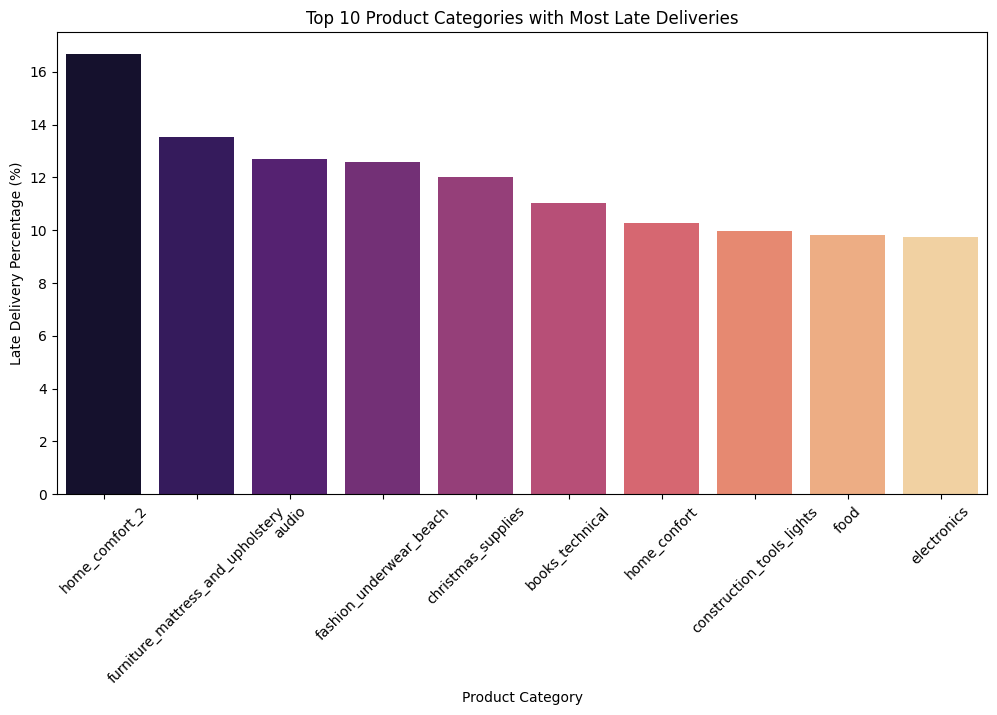

In [32]:
# Grouping late deliveries by product category
category_late_deliveries = df_cleaned.groupby("product_category_name_english")["late_delivery"].mean().sort_values(ascending=False)[:10] * 100

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=category_late_deliveries.index, y=category_late_deliveries.values, palette="magma")

plt.xlabel("Product Category")
plt.ylabel("Late Delivery Percentage (%)")
plt.title("Top 10 Product Categories with Most Late Deliveries")
plt.xticks(rotation=45)
plt.show()


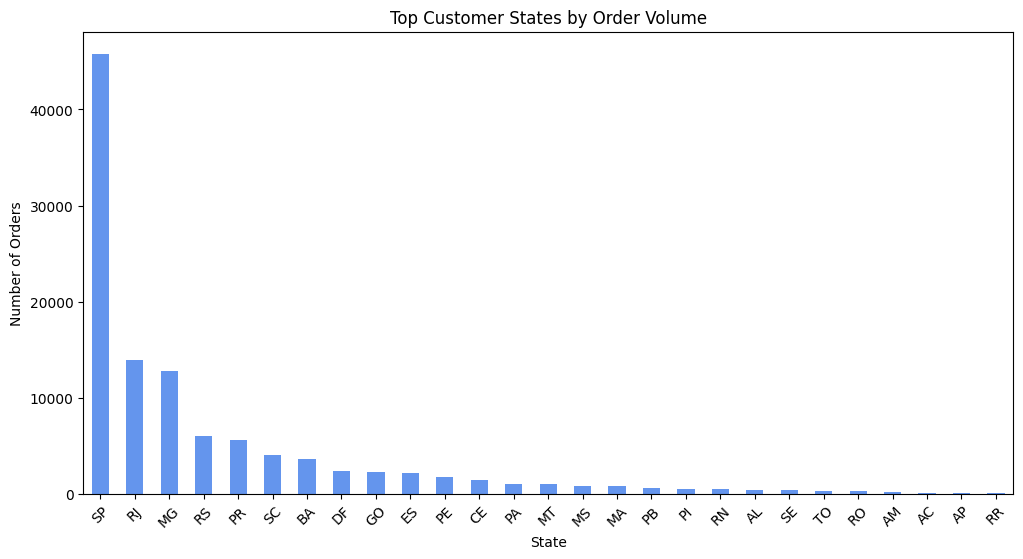

In [33]:
plt.figure(figsize=(12,6))
df_cleaned["customer_state"].value_counts().plot(kind="bar", color="cornflowerblue")
plt.title("Top Customer States by Order Volume")
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

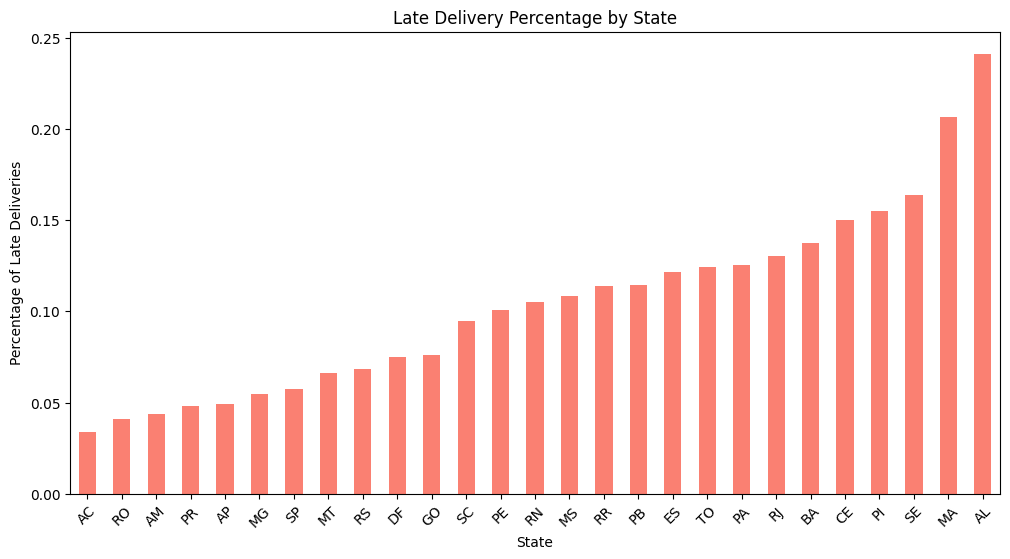

In [34]:
late_by_state = df_cleaned.groupby("customer_state")["late_delivery"].mean().sort_values()

plt.figure(figsize=(12,6))
late_by_state.plot(kind="bar", color="salmon")
plt.title("Late Delivery Percentage by State")
plt.xlabel("State")
plt.ylabel("Percentage of Late Deliveries")
plt.xticks(rotation=45)
plt.show()


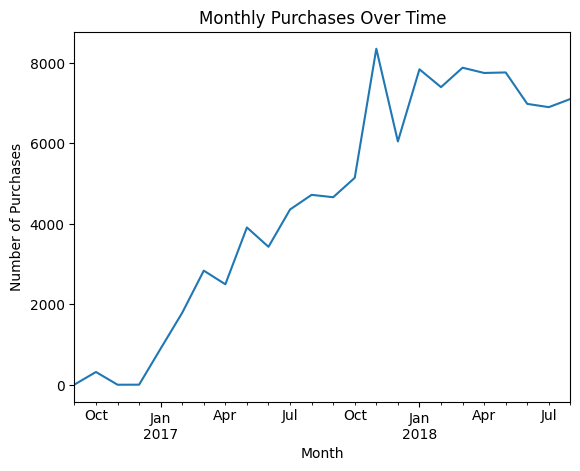

In [35]:
df_cleaned["order_purchase_timestamp"] = pd.to_datetime(df_cleaned["order_purchase_timestamp"])
df_cleaned.set_index("order_purchase_timestamp").resample("M")["order_id"].count().plot(kind="line")

plt.xlabel("Month")
plt.ylabel("Number of Purchases")
plt.title("Monthly Purchases Over Time")
plt.show()

In [36]:
late_deliveries = df_cleaned[df_cleaned["late_delivery"] == 1].groupby("order_purchase_month")["order_id"].count()
total_purchases = df_cleaned.groupby("order_purchase_month")["order_id"].count()

late_delivery_ratio = (late_deliveries / total_purchases).fillna(0)

print("Late delivery ratio per month:")
print(late_delivery_ratio)

Late delivery ratio per month:
order_purchase_month
1     0.060963
2     0.133718
3     0.165283
4     0.054531
5     0.065770
6     0.021413
7     0.041027
8     0.074569
9     0.051436
10    0.047776
11    0.137626
12    0.080978
Name: order_id, dtype: float64


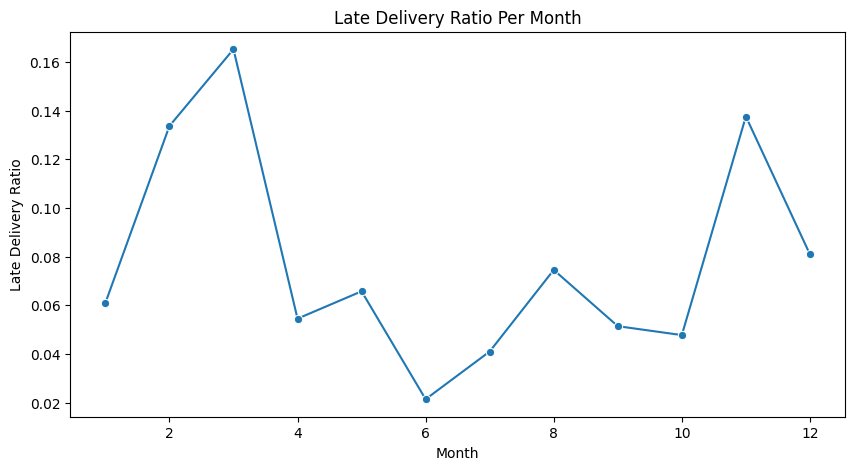

In [37]:
# 4. Line plot of late delivery ratio per month
late_deliveries = df_cleaned[df_cleaned["late_delivery"] == 1].groupby("order_purchase_month")["order_id"].count()
total_purchases = df_cleaned.groupby("order_purchase_month")["order_id"].count()
late_delivery_ratio = (late_deliveries / total_purchases).fillna(0)

plt.figure(figsize=(10, 5))
sns.lineplot(x=late_delivery_ratio.index, y=late_delivery_ratio.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Late Delivery Ratio")
plt.title("Late Delivery Ratio Per Month")
plt.show()

In [38]:
# Get the count of purchases for each month and sort them from highest to lowest
monthly_purchases = df_cleaned["order_purchase_month"].value_counts().sort_values(ascending=False)

# Print the result
print("Purchase count per month (from highest to lowest):")
print(monthly_purchases)
######### check if all the months are present in all the years
####### time plot 
###### compare ratios. what ratio of deliveries in sept were late compared to august
##### ratio for each month - use purchase count w late deliveries
#### you dont have to do anything w the numbers just use these raw numbers but explain it better

Purchase count per month (from highest to lowest):
8     11828
5     11677
7     11261
3     10721
6     10414
4     10251
2      9191
1      8743
11     8356
12     6051
10     5463
9      4666
Name: order_purchase_month, dtype: int64


In [39]:
# Group by 'order_purchase_month' and count the late deliveries (1 for late)
late_deliveries_by_month = df_cleaned.groupby('order_purchase_month')['late_delivery'].sum()

# Sort the result from highest to lowest
late_deliveries_by_month_sorted = late_deliveries_by_month.sort_values(ascending=False)

# Print the result
print("Late deliveries count per month (from most to least):")
print(late_deliveries_by_month_sorted)

Late deliveries count per month (from most to least):
order_purchase_month
3     1772
2     1229
11    1150
8      882
5      768
4      559
1      533
12     490
7      462
10     261
9      240
6      223
Name: late_delivery, dtype: int64


In [40]:
# Check the distribution of 'seller_state'
state_distribution = df_cleaned['seller_state'].value_counts()

# Print the distribution
print("State distribution:")
print(state_distribution)

State distribution:
SP    77462
PR     8429
MG     8401
RJ     4607
SC     3980
RS     2123
DF      873
BA      624
GO      499
PE      445
MA      402
ES      357
MT      144
CE       90
RN       56
MS       50
PB       34
RO       14
PI       11
SE       10
PA        8
AM        3
Name: seller_state, dtype: int64


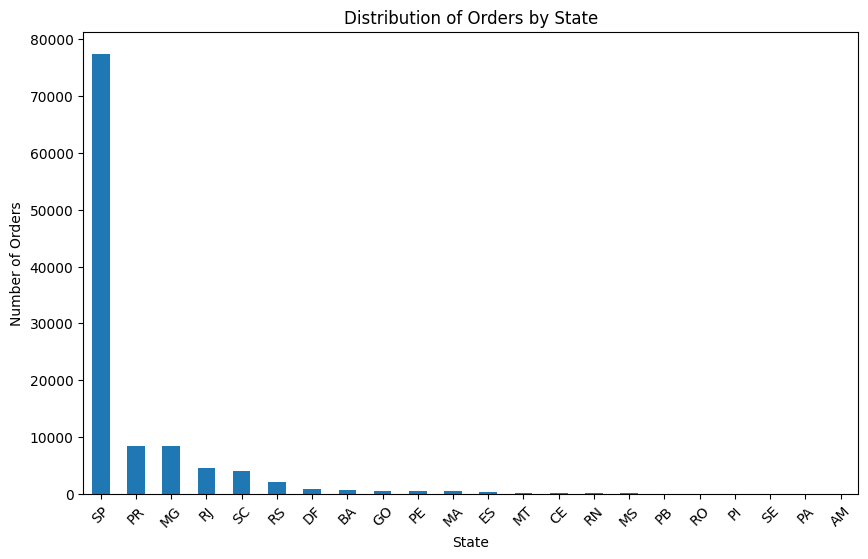

In [41]:
# Plot the state distribution
plt.figure(figsize=(10, 6))
state_distribution.plot(kind='bar')
plt.title('Distribution of Orders by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


In [42]:
# Group by 'seller_state' and sum the late deliveries
late_deliveries_by_state = df_cleaned.groupby('seller_state')['late_delivery'].sum()

# Sort the result from highest to lowest to identify the state with the most late deliveries
late_deliveries_by_state_sorted = late_deliveries_by_state.sort_values(ascending=False)

# Print the result
print("Late deliveries count per state (from most to least):")
print(late_deliveries_by_state_sorted)
### box plot for each state 

Late deliveries count per state (from most to least):
seller_state
SP    6576
PR     545
MG     471
RJ     370
SC     233
RS      97
MA      95
DF      59
BA      34
ES      21
GO      20
PE      18
CE       8
MT       7
RN       6
MS       4
AM       2
PB       2
PA       1
RO       0
PI       0
SE       0
Name: late_delivery, dtype: int64


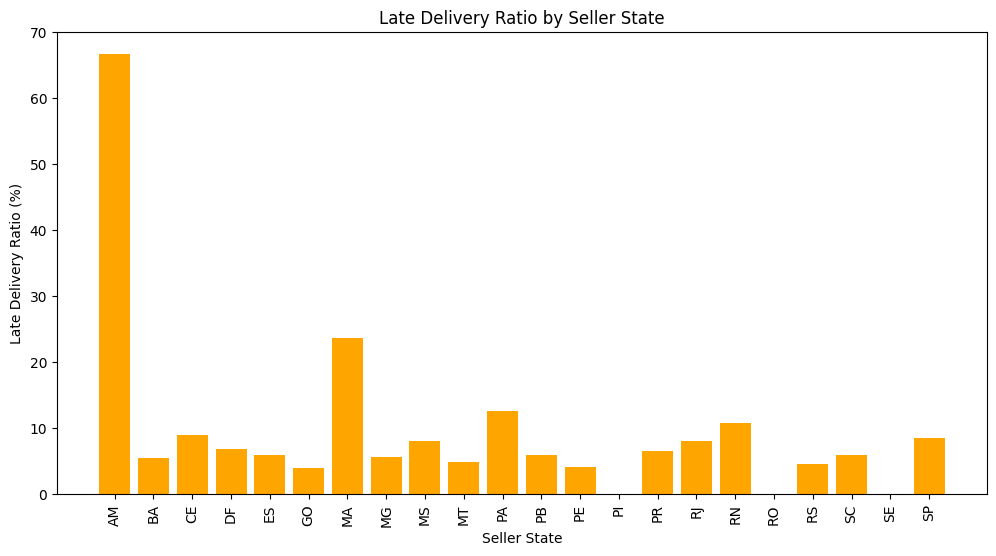

   seller_state  total_purchases  late_deliveries  late_delivery_ratio
0            AM                3                2            66.666667
1            BA              624               34             5.448718
2            CE               90                8             8.888889
3            DF              873               59             6.758305
4            ES              357               21             5.882353
5            GO              499               20             4.008016
6            MA              402               95            23.631841
7            MG             8401              471             5.606475
8            MS               50                4             8.000000
9            MT              144                7             4.861111
10           PA                8                1            12.500000
11           PB               34                2             5.882353
12           PE              445               18             4.044944
13    

In [43]:
# Grouping by 'seller_state' and aggregating total purchases and late deliveries
grouped = df_cleaned.groupby('seller_state').agg(
    total_purchases=('order_id', 'count'),  # Counting orders as total purchases
    late_deliveries=('late_delivery', 'sum')  # Summing late deliveries
).reset_index()

# Calculating the late delivery ratio by dividing late deliveries by total purchases
grouped['late_delivery_ratio'] = grouped['late_deliveries'] / grouped['total_purchases'] * 100

# Plotting the ratio for each seller state
plt.figure(figsize=(12, 6))
plt.bar(grouped['seller_state'], grouped['late_delivery_ratio'], color='orange')
plt.title('Late Delivery Ratio by Seller State')
plt.xlabel('Seller State')
plt.ylabel('Late Delivery Ratio (%)')
plt.xticks(rotation=90)
plt.show()

# Show the grouped data with the ratio
print(grouped)
 ## box plot for ratios 

In [44]:
# Filter the dataset for SP
df_sp = df_cleaned[df_cleaned['seller_state'] == 'SP']

# Get the total purchase count per month for SP
total_purchases_sp = df_sp.groupby('order_purchase_month')['order_id'].count()

# Get the late deliveries count per month for SP
late_deliveries_sp = df_sp.groupby('order_purchase_month')['late_delivery'].sum()

# Combine the results into one DataFrame
sp_purchase_vs_late = pd.DataFrame({'total_purchases': total_purchases_sp, 'late_deliveries': late_deliveries_sp})

# Sort the data by total purchases
sp_purchase_vs_late_sorted = sp_purchase_vs_late.sort_values(by='total_purchases', ascending=False)

# Print the results
print("Monthly purchases and late deliveries in SP (sorted by total purchases):")
print(sp_purchase_vs_late_sorted)


Monthly purchases and late deliveries in SP (sorted by total purchases):
                      total_purchases  late_deliveries
order_purchase_month                                  
5                                8511              588
8                                8477              689
7                                7998              331
3                                7662             1387
4                                7433              403
6                                7375              163
2                                6299              935
1                                6145              363
11                               6015              953
12                               4338              363
10                               3871              217
9                                3338              184


In [45]:
# Filter the dataset for month 3
df_august = df_cleaned[df_cleaned['order_purchase_month'] == 3]

# Group by seller_state and sum the late deliveries for month 3
late_deliveries_august_by_state = df_august.groupby('seller_state')['late_delivery'].sum()

# Sort the results from highest to lowest
late_deliveries_august_by_state_sorted = late_deliveries_august_by_state.sort_values(ascending=False)

# Print the result
print("States contributing to the most late deliveries in month 3:")
print(late_deliveries_august_by_state_sorted)


States contributing to the most late deliveries in month 3:
seller_state
SP    1387
RJ     114
PR      96
MG      74
SC      41
MA      22
RS      13
DF       8
ES       4
GO       4
BA       2
PE       2
RN       1
AM       1
MT       1
CE       1
PB       1
PI       0
RO       0
MS       0
Name: late_delivery, dtype: int64


In [46]:
##### national major holidays - could contribute to late deliveries
#### flag for it^ 
#### flag for orders that have multiple items
### no. of items per order 
#### calculate the total prodyct dimensions for each order for items
#### maximum height but total weight   
#### check the zip codes but mention in report that its not total longitutdes and latitutdes

In [47]:
# Count number of items per order
df_cleaned["order_item_count"] = df_cleaned.groupby("order_id")["order_id"].transform("count")

# Create a flag: 1 if more than 1 item, otherwise 0
df_cleaned["multiple_items_flag"] = (df_cleaned["order_item_count"] > 1).astype(int)

# Display result
df_cleaned[["order_id", "order_item_count", "multiple_items_flag"]].drop_duplicates().head()


,order_id,order_item_count,multiple_items_flag
0,e481f51cbdc54678b7cc49136f2d6af7,1,0
1,53cdb2fc8bc7dce0b6741e2150273451,1,0
2,47770eb9100c2d0c44946d9cf07ec65d,1,0
3,949d5b44dbf5de918fe9c16f97b45f8a,1,0
4,ad21c59c0840e6cb83a9ceb5573f8159,1,0


In [48]:
# Calculate product volume
df_cleaned["product_volume_cm3"] = (
    df_cleaned["product_length_cm"] * df_cleaned["product_height_cm"] * df_cleaned["product_width_cm"]
)

# Aggregate total weight and volume per order
order_totals = df_cleaned.groupby("order_id").agg(
    total_weight_g=("product_weight_g", "sum"),
    total_volume_cm3=("product_volume_cm3", "sum")
).reset_index()

df_cleaned = df_cleaned.merge(order_totals, on="order_id", how="left")
df_cleaned.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,items_per_order,has_multiple_items,total_product_dimensions,total_weight,order_month,order_item_count,multiple_items_flag,product_volume_cm3,total_weight_g,total_volume_cm3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,False,40.0,500.0,2017-10,1,0,1976.0,500.0,1976.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1,False,51.0,400.0,2018-07,1,0,4693.0,400.0,4693.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1,False,64.0,420.0,2018-08,1,0,9576.0,420.0,9576.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,1,False,60.0,450.0,2017-11,1,0,6000.0,450.0,6000.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,1,False,81.0,250.0,2018-02,1,0,11475.0,250.0,11475.0


In [49]:
# Define Brazilian holidays (Month-Day format)
brazil_holidays = [
    "01-01",  # New Year's Day
    "04-21",  # Tiradentes' Day
    "05-01",  # Labour Day
    "09-07",  # Independence Day
    "10-12",  # Our Lady of Aparecida
    "11-02",  # All Souls’ Day
    "11-15",  # Republic Day
    "12-25"   # Christmas Day
]

# Extract month-day from timestamp and create holiday flag
df_cleaned["is_holiday"] = df_cleaned["order_purchase_timestamp"].dt.strftime("%m-%d").isin(brazil_holidays).astype(int)

df_cleaned.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,has_multiple_items,total_product_dimensions,total_weight,order_month,order_item_count,multiple_items_flag,product_volume_cm3,total_weight_g,total_volume_cm3,is_holiday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,False,40.0,500.0,2017-10,1,0,1976.0,500.0,1976.0,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,False,51.0,400.0,2018-07,1,0,4693.0,400.0,4693.0,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,False,64.0,420.0,2018-08,1,0,9576.0,420.0,9576.0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,False,60.0,450.0,2017-11,1,0,6000.0,450.0,6000.0,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,False,81.0,250.0,2018-02,1,0,11475.0,250.0,11475.0,0


In [50]:
df_cleaned["delivered_mm_dd"] = df_cleaned["order_delivered_customer_date"].dt.strftime("%m-%d")

holiday_week = set()
for holiday in brazil_holidays:
    month, day = map(int, holiday.split("-"))  # Extract month and day as integers
    for delta in range(-3, 4): 
        new_day = day + delta  
        if new_day > 0:  
            holiday_week.add(f"{month:02d}-{new_day:02d}")

# Check if the delivery date falls within the holiday week
df_cleaned["holiday_week"] = df_cleaned["delivered_mm_dd"].isin(holiday_week)

# Assuming 'late_delivery' is not explicitly present, create it based on delivery vs. estimated date
df_cleaned["late_delivery"] = df_cleaned["order_delivered_customer_date"] > df_cleaned["order_estimated_delivery_date"]

# Filter late deliveries that happened during the holiday week
late_holiday_week_deliveries = df_cleaned[df_cleaned["late_delivery"] & df_cleaned["holiday_week"]]

# Display results
print(late_holiday_week_deliveries[["order_id"]].count())

order_id    1115
dtype: int64


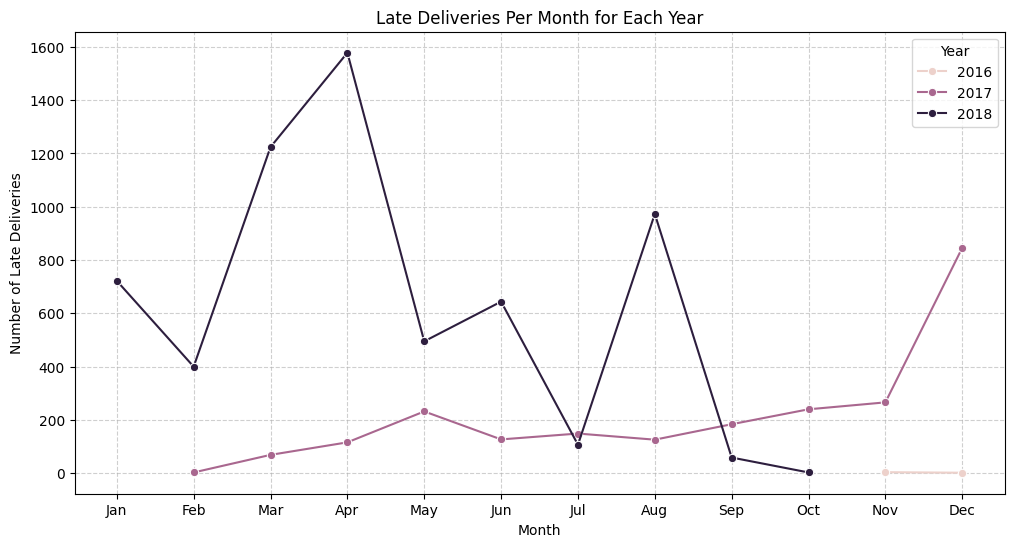

In [51]:
df_cleaned["order_delivered_customer_date"] = pd.to_datetime(df_cleaned["order_delivered_customer_date"])
df_cleaned["order_estimated_delivery_date"] = pd.to_datetime(df_cleaned["order_estimated_delivery_date"])

# Create 'late_delivery' flag (if not already in dataset)
df_cleaned["late_delivery"] = df_cleaned["order_delivered_customer_date"] > df_cleaned["order_estimated_delivery_date"]

# Extract year and month
df_cleaned["year"] = df_cleaned["order_delivered_customer_date"].dt.year
df_cleaned["month"] = df_cleaned["order_delivered_customer_date"].dt.month

# Count late deliveries per (year, month)
late_deliveries_by_month = df_cleaned[df_cleaned["late_delivery"]].groupby(["year", "month"]).size().reset_index(name="late_count")

# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(data=late_deliveries_by_month, x="month", y="late_count", hue="year", marker="o")

# Improve plot aesthetics
plt.title("Late Deliveries Per Month for Each Year")
plt.xlabel("Month")
plt.ylabel("Number of Late Deliveries")
plt.xticks(range(1, 13), [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])  # Set readable month labels
plt.legend(title="Year")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


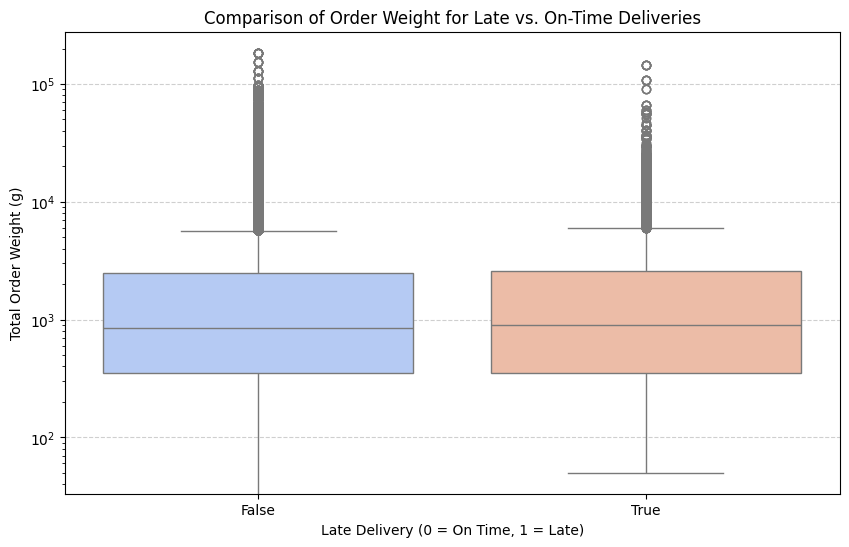

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x="late_delivery", y="total_weight_g", palette="coolwarm")

# Improve plot aesthetics
plt.xlabel("Late Delivery (0 = On Time, 1 = Late)")
plt.ylabel("Total Order Weight (g)")
plt.title("Comparison of Order Weight for Late vs. On-Time Deliveries")
plt.yscale("log")  # Log scale to handle extreme weight differences
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.show()

In [53]:
###flag for multiple seller, multiple order and they are getting late
### difference btw estimated delivery date and carrier date
### distance btw seller and customer and their relationship with freight value(positive relation)

In [54]:
# 1. Flag orders with multiple sellers
sellers_per_order = df_cleaned.groupby('order_id')['seller_id'].nunique()
multi_seller_orders = sellers_per_order[sellers_per_order > 1].index
df_cleaned['multiple_sellers'] = df_cleaned['order_id'].isin(multi_seller_orders)

# 2. Flag customers with multiple orders
orders_per_customer = df_cleaned.groupby('customer_unique_id')['order_id'].nunique()
multi_order_customers = orders_per_customer[orders_per_customer > 1].index
df_cleaned['multiple_orders_by_customer'] = df_cleaned['customer_unique_id'].isin(multi_order_customers)

# 3. Flag orders that were delivered late
late_orders = df_cleaned[df_cleaned['order_delivered_customer_date'] > df_cleaned['order_estimated_delivery_date']]['order_id'].unique()
df_cleaned['delivered_late'] = df_cleaned['order_id'].isin(late_orders)


# Display the updated dataset (optional)
df_cleaned.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,total_weight_g,total_volume_cm3,is_holiday,delivered_mm_dd,holiday_week,year,month,multiple_sellers,multiple_orders_by_customer,delivered_late
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,500.0,1976.0,0,10-10,True,2017,10,False,True,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,400.0,4693.0,0,08-07,False,2018,8,False,False,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,420.0,9576.0,0,08-17,False,2018,8,False,False,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,450.0,6000.0,0,12-02,False,2017,12,False,False,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,250.0,11475.0,0,02-16,False,2018,2,False,False,False


In [55]:
# Calculate difference in days
df_cleaned['est_vs_carrier_diff_days'] = (df_cleaned['order_estimated_delivery_date'] - df_cleaned['order_delivered_carrier_date']).dt.days

# Filter orders where carrier delivered after estimated date
late_by_carrier = df_cleaned[df_cleaned['order_delivered_carrier_date'] > df_cleaned['order_estimated_delivery_date']]

# Count how many such orders
print("Number of orders delivered after estimated date by the carrier:", len(late_by_carrier))

Number of orders delivered after estimated date by the carrier: 521


In [56]:
df_cleaned['carrier_delivered_late'] = df_cleaned['order_delivered_carrier_date'] > df_cleaned['order_estimated_delivery_date']

In [57]:
# Count unique sellers per order
seller_count = df_cleaned.groupby('order_id')['seller_id'].nunique().reset_index()
seller_count.rename(columns={'seller_id': 'seller_count'}, inplace=True)

# Count number of items per order
item_count = df_cleaned.groupby('order_id')['order_item_id'].count().reset_index()
item_count.rename(columns={'order_item_id': 'item_count'}, inplace=True)

# Merge both into the original dataframe
df_cleaned = df_cleaned.merge(seller_count, on='order_id', how='left')
df_cleaned = df_cleaned.merge(item_count, on='order_id', how='left')

# Flag late deliveries
df_cleaned['order_delivered_customer_date'] = pd.to_datetime(df_cleaned['order_delivered_customer_date'], errors='coerce')
df_cleaned['order_estimated_delivery_date'] = pd.to_datetime(df_cleaned['order_estimated_delivery_date'], errors='coerce')
df_cleaned['delivered_late'] = df_cleaned['order_delivered_customer_date'] > df_cleaned['order_estimated_delivery_date']

# Create the final flag
df_cleaned['multi_seller_multi_item_late'] = (
    (df_cleaned['seller_count'] > 1) &
    (df_cleaned['item_count'] > 1) &
    (df_cleaned['delivered_late'])
)


In [58]:
df_cleaned['multi_seller_multi_item_late'].sum()

37

### Adding Geolocation

In [59]:
geolocation = pd.read_csv('cleaned_geolocation.csv')

# Calculate average lat/lng for each ZIP prefix
geo = geolocation.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()
geo.columns = ['zip_code', 'lat', 'lng']

# Ensure ZIPs are integers
df_cleaned = df_cleaned.dropna(subset=['customer_zip_code_prefix', 'seller_zip_code_prefix'])
df_cleaned['customer_zip_code_prefix'] = df_cleaned['customer_zip_code_prefix'].astype('Int64')
df_cleaned['seller_zip_code_prefix'] = df_cleaned['seller_zip_code_prefix'].astype('Int64')



# Merge customer coordinates
df_cleaned = df_cleaned.merge(
    geo.rename(columns={
        'zip_code': 'customer_zip_code_prefix',
        'lat': 'customer_lat',
        'lng': 'customer_lng'
    }),
    on='customer_zip_code_prefix', how='left'
)

# Merge seller coordinates
df_cleaned = df_cleaned.merge(
    geo.rename(columns={
        'zip_code': 'seller_zip_code_prefix',
        'lat': 'seller_lat',
        'lng': 'seller_lng'
    }),
    on='seller_zip_code_prefix', how='left'
)

# Calculate distance in km
df_cleaned['distance_km'] = df_cleaned.apply(
    lambda row: geodesic((row['customer_lat'], row['customer_lng']),
                         (row['seller_lat'], row['seller_lng'])).km
    if pd.notnull(row['customer_lat']) and pd.notnull(row['seller_lat']) else None,
    axis=1
)

df_cleaned.dropna(inplace=True)

# Save updated dataset
df_cleaned.to_csv("merged_dataset_with_distance.csv", index=False)


In [60]:
df_cleaned['delivery_status'] = df_cleaned['order_delivered_customer_date'] <= df_cleaned['order_estimated_delivery_date']
df_cleaned['delivery_status'] = df_cleaned['delivery_status'].map({True: 'on_time', False: 'late'})

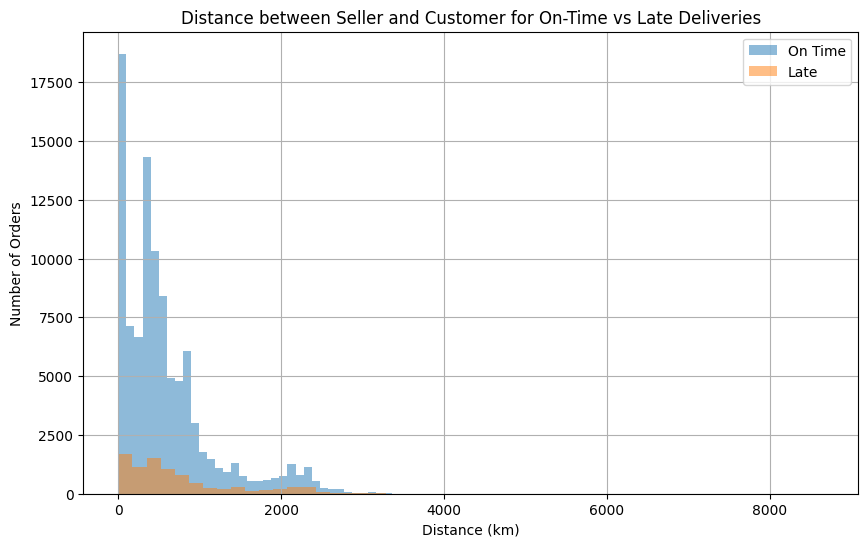

In [61]:
on_time = df_cleaned[df_cleaned['delivery_status'] == 'on_time']
late = df_cleaned[df_cleaned['delivery_status'] == 'late']

plt.figure(figsize=(10, 6))
plt.hist(on_time['distance_km'].dropna(), bins=50, alpha=0.5, label='On Time')
plt.hist(late['distance_km'].dropna(), bins=50, alpha=0.5, label='Late')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Orders')
plt.title('Distance between Seller and Customer for On-Time vs Late Deliveries')
plt.legend()
plt.grid(True)
plt.show()


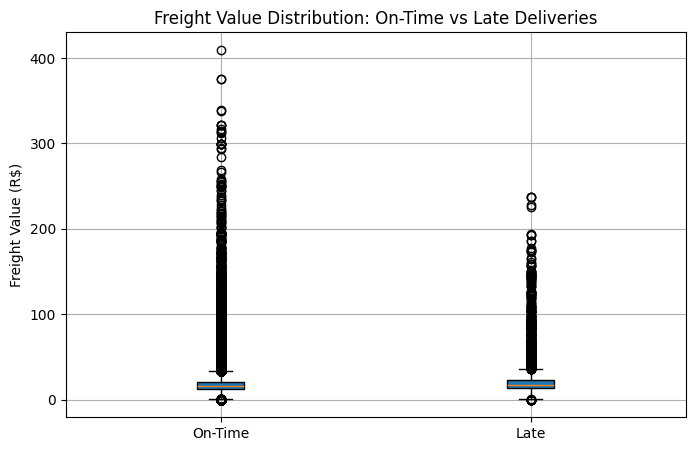

In [62]:
# Double-check:
df_cleaned[['order_id', 'freight_value', 'delivery_status']].head()

# Drop rows where freight_value is missing
df_cleaned_freight = df_cleaned.dropna(subset=['freight_value'])

# Split by delivery status
on_time = df_cleaned_freight[df_cleaned_freight['delivery_status'] == 'on_time']
late = df_cleaned_freight[df_cleaned_freight['delivery_status'] == 'late']

# Boxplot of freight value
plt.figure(figsize=(8, 5))
plt.boxplot(
    [on_time['freight_value'], late['freight_value']],
    labels=['On-Time', 'Late'],
    patch_artist=True
)
plt.ylabel('Freight Value (R$)')
plt.title('Freight Value Distribution: On-Time vs Late Deliveries')
plt.grid(True)
plt.show()

Number of orders handed to carrier AFTER the estimated delivery date: 521
Total orders considered: 108092
Percentage: 0.48%


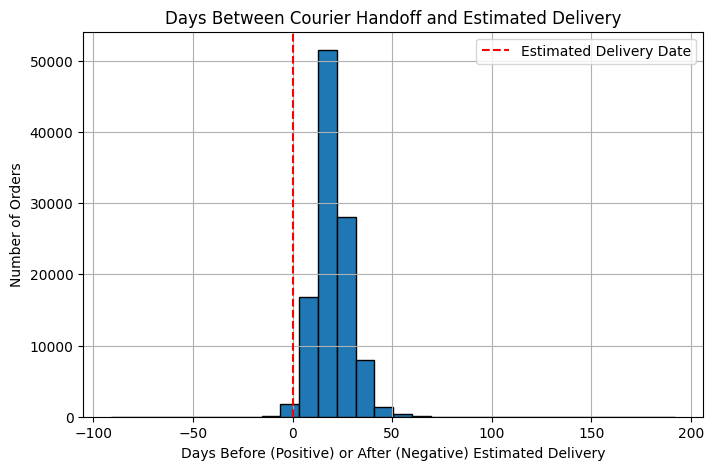

In [63]:
# Filter rows where both dates are available
dispatch_df = df_cleaned.dropna(subset=['order_estimated_delivery_date', 'order_delivered_carrier_date']).copy()

# Calculate days early or late for dispatch
dispatch_df['days_early_or_late_dispatch'] = (
    dispatch_df['order_estimated_delivery_date'] - dispatch_df['order_delivered_carrier_date']
).dt.days

# Identify late dispatches (handover to carrier AFTER estimated delivery date)
late_dispatch = dispatch_df[dispatch_df['days_early_or_late_dispatch'] < 0]

# Print summary
print(f"Number of orders handed to carrier AFTER the estimated delivery date: {len(late_dispatch)}")
print(f"Total orders considered: {len(dispatch_df)}")
print(f"Percentage: {100 * len(late_dispatch) / len(dispatch_df):.2f}%")

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(dispatch_df['days_early_or_late_dispatch'], bins=30, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='Estimated Delivery Date')
plt.title('Days Between Courier Handoff and Estimated Delivery')
plt.xlabel('Days Before (Positive) or After (Negative) Estimated Delivery')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.show()


In [64]:
# Flag feature for late deliveries
df_cleaned['is_late'] = df_cleaned['delivery_status'].map({'on_time': 0, 'late': 1})
df_cleaned

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_count,item_count,multi_seller_multi_item_late,customer_lat,customer_lng,seller_lat,seller_lng,distance_km,delivery_status,is_late
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,1,False,-23.577482,-46.587077,-23.680862,-46.444311,18.528985,on_time,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1,1,False,-12.186877,-44.540232,-19.807885,-43.980818,845.460167,on_time,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1,1,False,-16.745150,-48.514783,-21.363473,-48.229588,512.096987,on_time,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,1,1,False,-5.774002,-35.270976,-19.836871,-43.923241,1815.991779,on_time,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,1,1,False,-23.676257,-46.514580,-23.541525,-46.262148,29.771953,on_time,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108617,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,1,1,False,-24.001334,-46.450022,-21.930464,-50.498065,474.214680,on_time,0
108618,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,1,1,False,-17.898045,-39.373106,-23.553949,-46.453257,967.080272,on_time,0
108619,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,1,2,False,-22.563909,-42.695343,-20.940712,-45.827195,370.459066,on_time,0
108620,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,1,2,False,-22.563909,-42.695343,-20.940712,-45.827195,370.459066,on_time,0


### Drop duplicate rows

In [65]:
df_cleaned.drop_duplicates(subset=['customer_id', 'price', 'order_approved_at', 'item_count'], inplace=True)

### Correlation matrix

<Axes: >

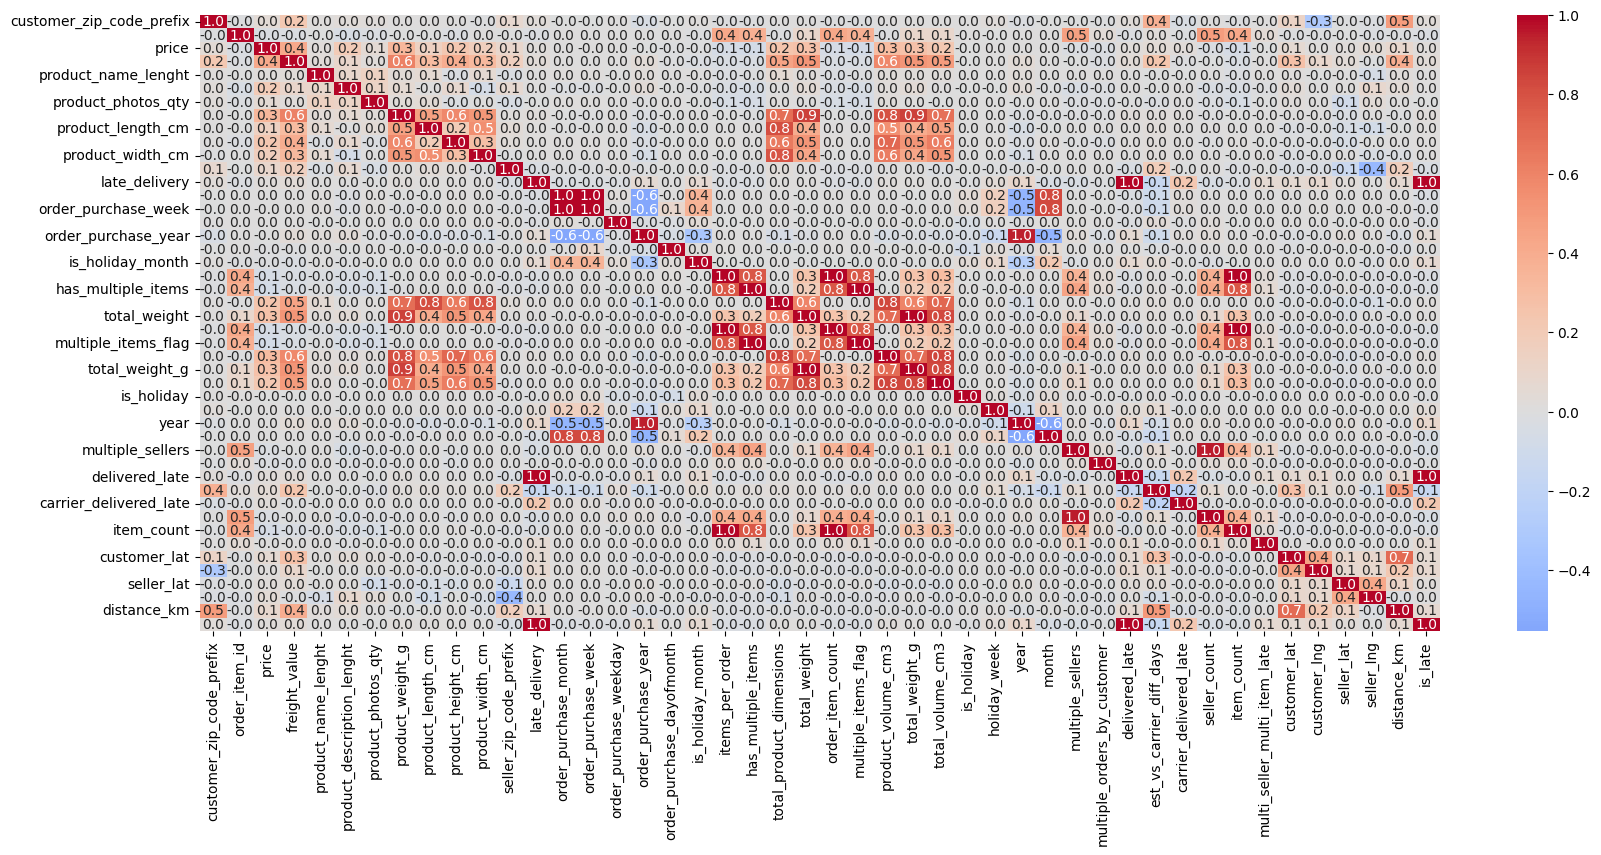

In [66]:
df_cleaned.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".1f", cmap='coolwarm', center=0)

In [67]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97153 entries, 0 to 108621
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97153 non-null  object        
 1   customer_id                    97153 non-null  object        
 2   order_status                   97153 non-null  object        
 3   order_purchase_timestamp       97153 non-null  datetime64[ns]
 4   order_approved_at              97153 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97153 non-null  datetime64[ns]
 6   order_delivered_customer_date  97153 non-null  datetime64[ns]
 7   order_estimated_delivery_date  97153 non-null  datetime64[ns]
 8   customer_unique_id             97153 non-null  object        
 9   customer_zip_code_prefix       97153 non-null  Int64         
 10  customer_city                  97153 non-null  object        
 11  customer_state

### Model Training

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

In [69]:
df_cleaned.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english', 'late_delivery',
       'order_purchase_month', 'order_purchase_week', 'order_purchase_weekday',
       'order_purchase_year', 'order_purchase_dayofmonth', 'is_holiday_month',
       'items_per_order', 'has_multiple_items', 'total_product_dimensions',
       'total_weight', 'order_m

<Axes: >

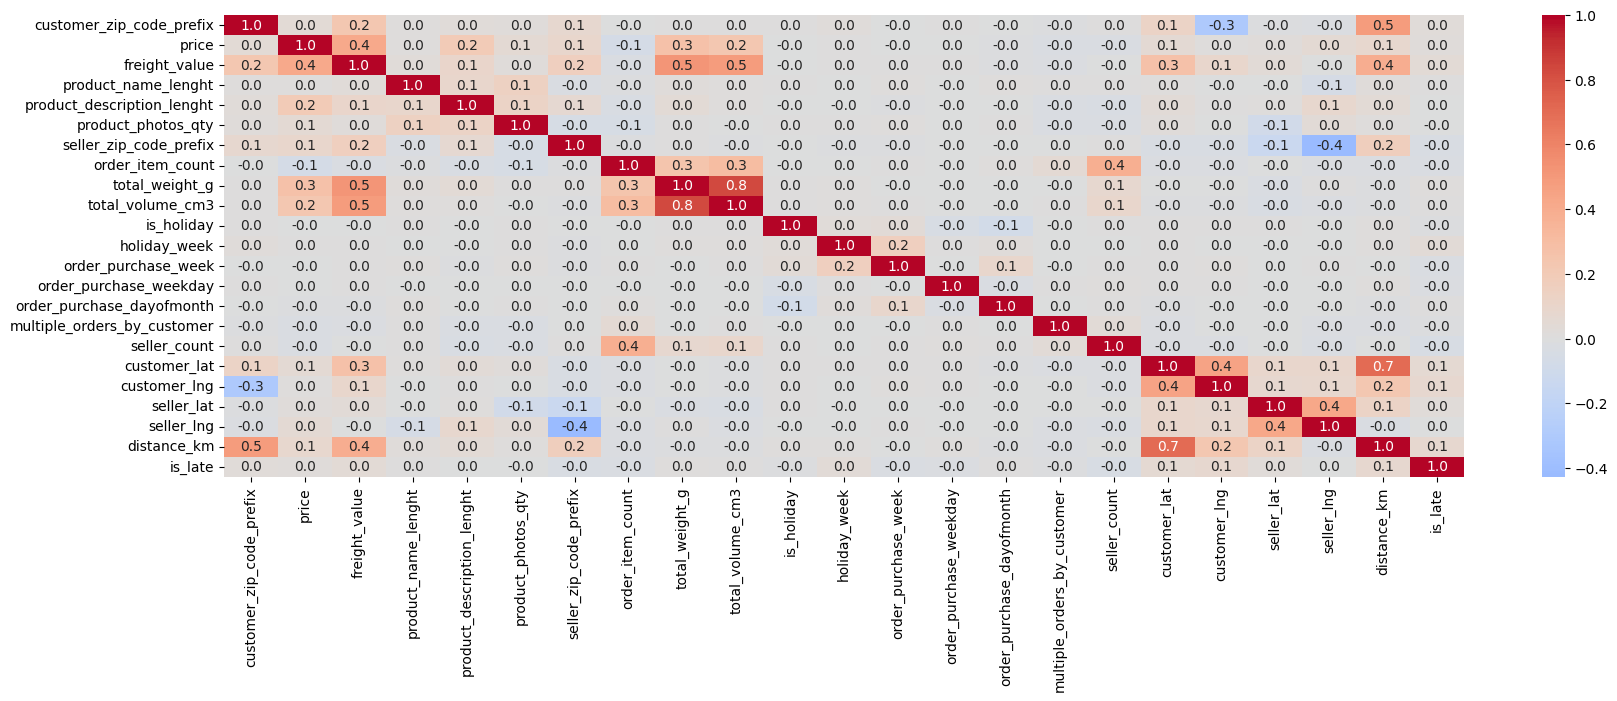

In [70]:
plt.figure(figsize=(20, 6))
sns.heatmap(df_cleaned[['customer_zip_code_prefix', 'price', 'freight_value',
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
    'seller_zip_code_prefix', 'order_item_count',
    'total_weight_g', 'total_volume_cm3',
    'is_holiday', 'holiday_week', 'order_purchase_week', 'order_purchase_weekday',  'order_purchase_dayofmonth',
    'multiple_orders_by_customer', 
    'seller_count', 'customer_lat', 'customer_lng', 'seller_lat', 'seller_lng',
    'distance_km', 'delivery_status', 'is_late']].corr(), cmap='coolwarm', annot=True, fmt=".1f", center=0)

### Distance vs late deliveries

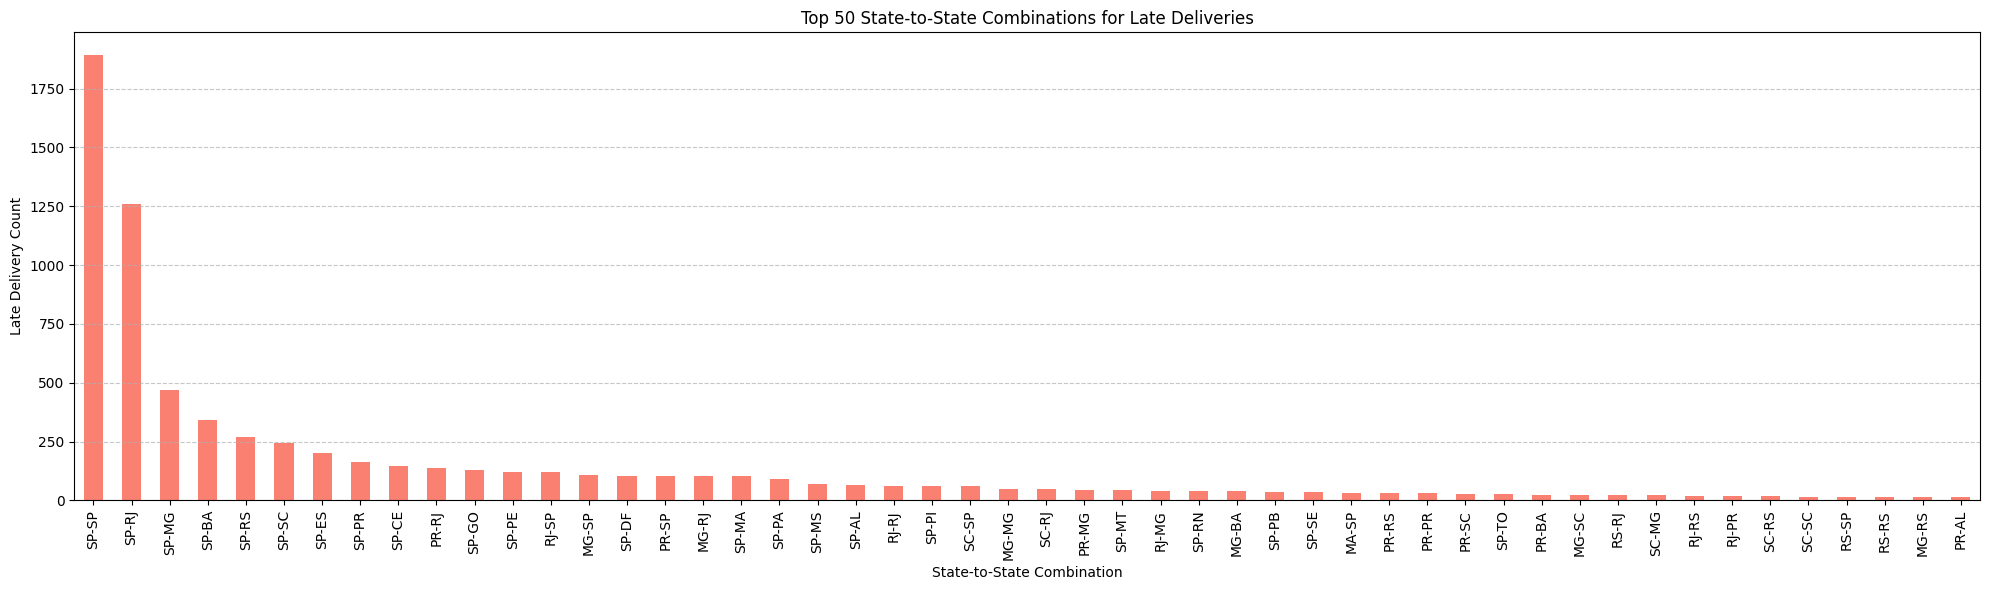

In [118]:
df_cleaned['state_to_state'] = df_cleaned['seller_state'] + '-' + df_cleaned['customer_state']
df_cleaned[df_cleaned['is_late'] == 1]['state_to_state'].value_counts().head(50).plot(kind='bar', figsize=(20, 6), color='salmon')
plt.title('Top 50 State-to-State Combinations for Late Deliveries')
plt.xlabel('State-to-State Combination')
plt.ylabel('Late Delivery Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('state_to_state_late_deliveries.png', dpi=500)

### Route Map

In [116]:
import folium
from folium import PolyLine
from folium.plugins import MarkerCluster

# Step 1: Identify the top 10 state-to-state combinations with late deliveries
state_combinations = (
    df_cleaned[df_cleaned['is_late'] == 1]['state_to_state']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'state_to_state', 'state_to_state': 'late_count'})
)

# Step 2: Filter the dataset for these combinations
top_combinations = state_combinations.head(5)  # Top 10 combinations
filtered_data = df_cleaned[df_cleaned['state_to_state'].isin(top_combinations['state_to_state'])]

# Step 3: Initialize a map centered at Brazil
brazil_map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Step 4: Add lines, dots, and labels for each combination
for _, row in top_combinations.iterrows():
    seller_state, customer_state = row['state_to_state'].split('-')
    late_count = row['late_count']
    
    # Get the coordinates for seller and customer states
    seller_coords = filtered_data[filtered_data['seller_state'] == seller_state][['seller_lat', 'seller_lng']].iloc[0]
    customer_coords = filtered_data[filtered_data['customer_state'] == customer_state][['customer_lat', 'customer_lng']].iloc[0]
    
    # Draw a line between seller and customer
    PolyLine(
        locations=[
            [seller_coords['seller_lat'], seller_coords['seller_lng']],
            [customer_coords['customer_lat'], customer_coords['customer_lng']]
        ],
        color='blue',
        weight=2,
        opacity=0.7
    ).add_to(brazil_map)
    
    # Add dots for starting (seller) and ending (customer) points
    folium.CircleMarker(
        location=[seller_coords['seller_lat'], seller_coords['seller_lng']],
        radius=5,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=1,
        popup=f"Seller: {seller_state}"
    ).add_to(brazil_map)
    
    folium.CircleMarker(
        location=[customer_coords['customer_lat'], customer_coords['customer_lng']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=1,
        popup=f"Customer: {customer_state}"
    ).add_to(brazil_map)
    
    folium.CircleMarker(
        location=customer_coords,
        radius=25,  # Circle size
        # color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.3
    ).add_to(brazil_map)
    
    # Add the count label inside the circle, centered
    folium.Marker(
        location=customer_coords,
        icon=folium.DivIcon(html=f"""
            <div style='font-size: 14px; color: white; text-align: center; font-weight: bold; line-height: 20px;'>
                {late_count}
            </div>
        """)
    ).add_to(brazil_map)

# Step 5: Display the map
brazil_map

In [73]:
feature_cols = [
    'customer_zip_code_prefix', 'price', 'freight_value',
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
    'seller_zip_code_prefix', 'order_item_count',
    'total_weight_g', 'total_volume_cm3',
    'is_holiday', 'holiday_week', 'order_purchase_week', 'order_purchase_weekday',  'order_purchase_dayofmonth',
    'multiple_orders_by_customer', 
    'seller_count', 'customer_lat', 'customer_lng', 'seller_lat', 'seller_lng',
    'distance_km'
]

X = df_cleaned[feature_cols].dropna()  # ensure no missing values
y = df_cleaned.loc[X.index, 'is_late']  # match target to X

feature_names = X.columns

# ----------------------------
# 3. Train-test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
rf = RandomForestClassifier(n_estimators=100, 
                            class_weight='balanced', 
                            random_state=42)
rf.fit(X_train_scaled, y_train)

# 6. Predict & Evaluate
y_pred = rf.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     17882
           1       0.80      0.07      0.13      1549

    accuracy                           0.92     19431
   macro avg       0.86      0.53      0.55     19431
weighted avg       0.92      0.92      0.89     19431



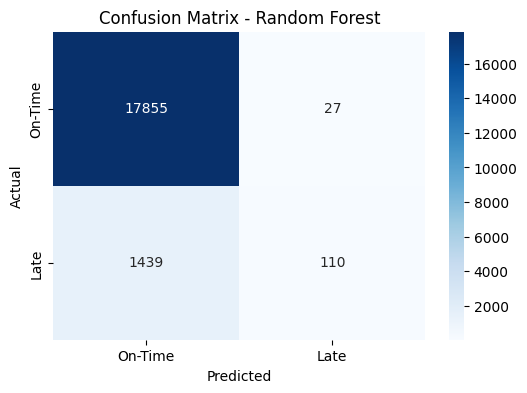

In [75]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['On-Time', 'Late'], yticklabels=['On-Time', 'Late'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [76]:
print(f"Random Forest Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

Random Forest Accuracy Score: 0.9246


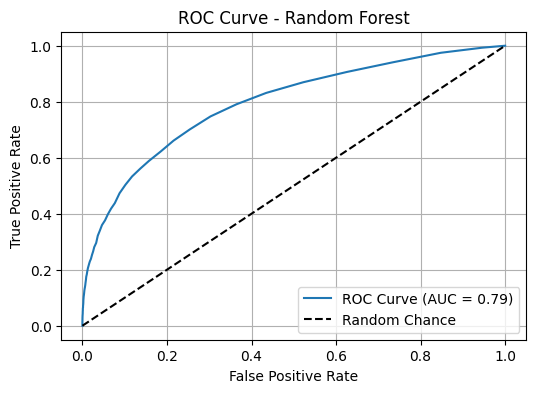

Top 10 Important Features:
 order_purchase_week           0.130483
customer_lng                  0.076702
customer_zip_code_prefix      0.072848
customer_lat                  0.070170
distance_km                   0.067964
freight_value                 0.060684
product_description_lenght    0.053414
price                         0.052735
order_purchase_dayofmonth     0.051171
total_volume_cm3              0.050499
dtype: float64


In [77]:
y_probs = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 8. Feature Importance 
feature_importance = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
print("Top 10 Important Features:\n", feature_importance.head(10))

In [78]:
import xgboost as xgb

In [79]:
X = df_cleaned[feature_cols].dropna()
y = df_cleaned.loc[X.index, 'is_late']
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [80]:
sscaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# 4. Compute scale_pos_weight to handle class imbalance
# ----------------------------
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"scale_pos_weight: {scale_pos_weight:.2f}")


# 3. Train XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train_scaled, y_train)

# 4. Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


scale_pos_weight: 11.55
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     17882
           1       0.24      0.58      0.34      1549

    accuracy                           0.82     19431
   macro avg       0.60      0.71      0.62     19431
weighted avg       0.90      0.82      0.85     19431



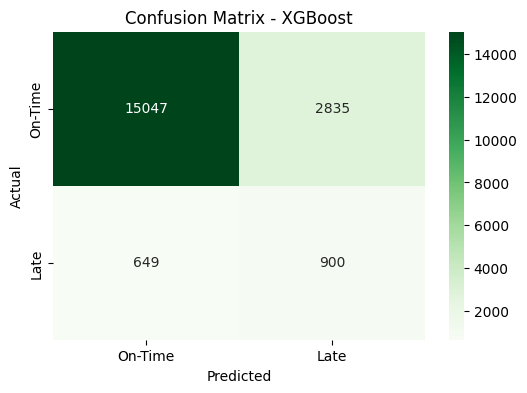

In [81]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='Greens',
            xticklabels=['On-Time', 'Late'], yticklabels=['On-Time', 'Late'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [82]:
print(f"XGBoost Accuracy Score: {accuracy_score(y_test, y_pred_xgb):.4f}")

XGBoost Accuracy Score: 0.8207


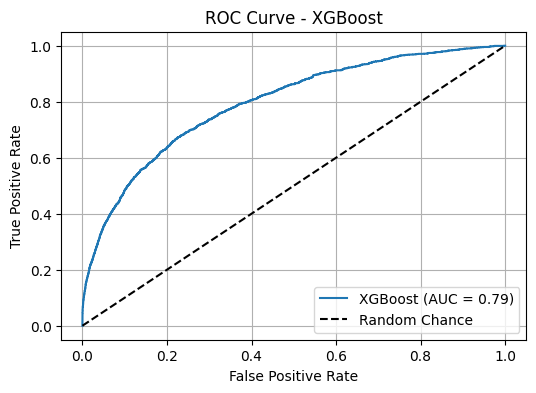

In [83]:
y_probs_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
selected_cols = feature_cols

In [86]:
X = df_cleaned[selected_cols]
y = df_cleaned['is_late']

In [87]:
# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
# 5. Train the Logistic Regression model
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [89]:
# 6. Predict and evaluate
y_pred = log_model.predict(X_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.62      0.75     17882
           1       0.11      0.56      0.19      1549

    accuracy                           0.61     19431
   macro avg       0.53      0.59      0.47     19431
weighted avg       0.88      0.61      0.70     19431



In [90]:
print(cm)


[[17855    27]
 [ 1439   110]]


In [91]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.6138129792599455


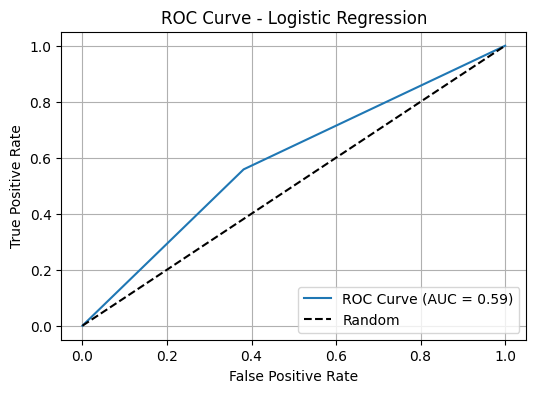

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### New code for training and evaluting models

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

X = df_cleaned[feature_cols]
y = df_cleaned.loc[X.index, 'is_late']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Cross validation (K fold)

cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# 2. Random Forest Grid Search (Hyperparameter optimization)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_scaled, y_train)
best_rf = rf_grid.best_estimator_

# 3. XGBoost Grid Search (Hyperparameter optimization)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}
xgb_grid = GridSearchCV(xgb_clf, xgb_param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_scaled, y_train)
best_xgb = xgb_grid.best_estimator_


# 4. Logistic Regression Grid Search (Hyperparameter optimization)
log_param_grid = {
    'C': [0.01, 0.1, 1.0, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}
log_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_grid = GridSearchCV(log_model, log_param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
log_grid.fit(X_train_scaled, y_train)
best_log = log_grid.best_estimator_


In [106]:
feature_importance = pd.Series(best_rf.feature_importances_, index=feature_names).sort_values(ascending=False)
print("Top 10 Important Features for Random FOrest:\n", feature_importance.head(10))

# Get feature importance from XGBoost
xgb_feature_importance = best_xgb.get_booster().get_score(importance_type="gain")

# Map feature indices to actual feature names
mapped_feature_importance = {feature_cols[int(key[1:])]: value for key, value in xgb_feature_importance.items()}

# Convert to a sorted DataFrame
xgb_feature_importance_df = pd.DataFrame.from_dict(mapped_feature_importance, orient='index', columns=['importance']).reset_index()
xgb_feature_importance_df.columns = ['feature', 'importance']
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='importance', ascending=False)

# Display top 10 features
print("\nTop 10 Features for XGBoost:")
print(xgb_feature_importance_df.head(10))

# Calculate feature importance for Logistic Regression
log_feature_importance = np.array(np.std(X, 0)) * best_log.coef_[0]

# Create a DataFrame for feature importance
log_feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': log_feature_importance
}).sort_values(by='importance', ascending=False, key=abs)  # Sort by absolute importance

# Display top 10 features
print("\nTop 10 Features for Logistic Regression:")
print(log_feature_importance_df.head(10))

Top 10 Important Features for Random FOrest:
 order_purchase_week           0.133670
customer_lng                  0.076477
customer_zip_code_prefix      0.073016
customer_lat                  0.069970
distance_km                   0.067331
freight_value                 0.061269
product_description_lenght    0.053051
price                         0.052480
order_purchase_dayofmonth     0.051304
total_volume_cm3              0.050538
dtype: float64

Top 10 Features for XGBoost:
                     feature  importance
16              seller_count   82.309547
11              holiday_week   34.977501
12       order_purchase_week   26.886480
0   customer_zip_code_prefix   14.508403
21               distance_km   14.039909
17              customer_lat   13.963240
18              customer_lng   13.934711
19                seller_lat   13.904078
6     seller_zip_code_prefix   13.456203
7           order_item_count   13.011524

Top 10 Features for Logistic Regression:
                       fea

Random Forest Classification Report (Threshold = 0.5):
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     17882
           1       0.76      0.09      0.17      1549

    accuracy                           0.93     19431
   macro avg       0.84      0.55      0.56     19431
weighted avg       0.91      0.93      0.90     19431



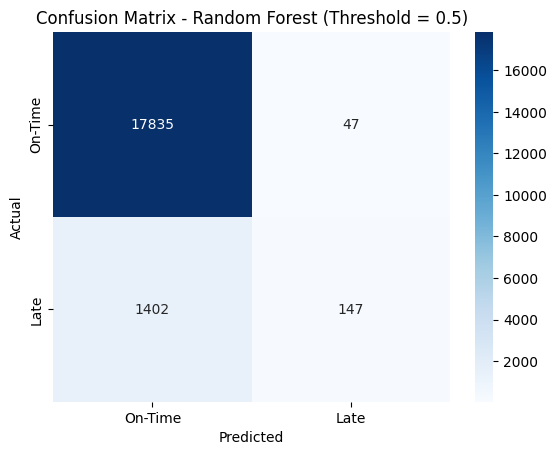

Random Forest AUC: 0.8026


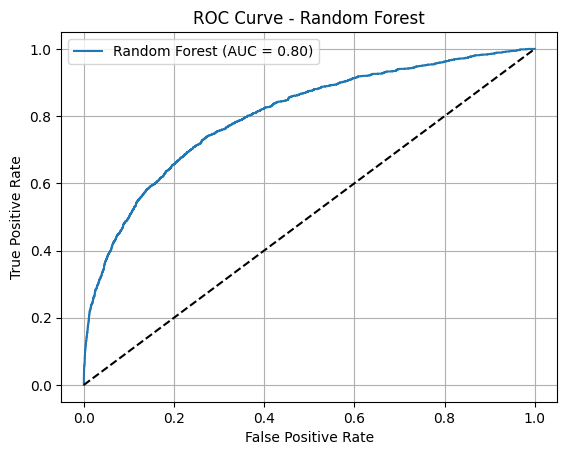

XGBoost Classification Report (Threshold = 0.5):
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     17882
           1       0.39      0.39      0.39      1549

    accuracy                           0.90     19431
   macro avg       0.67      0.67      0.67     19431
weighted avg       0.90      0.90      0.90     19431



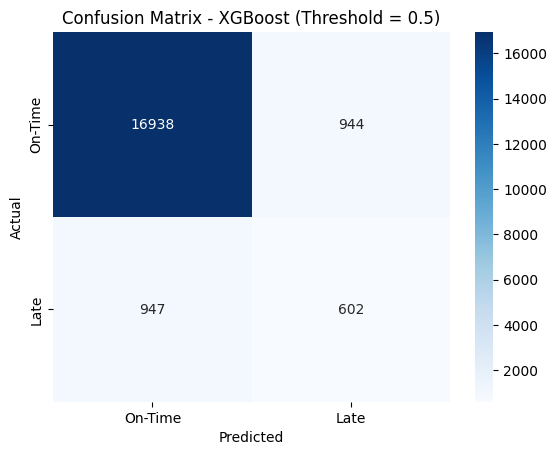

XGBoost AUC: 0.7898


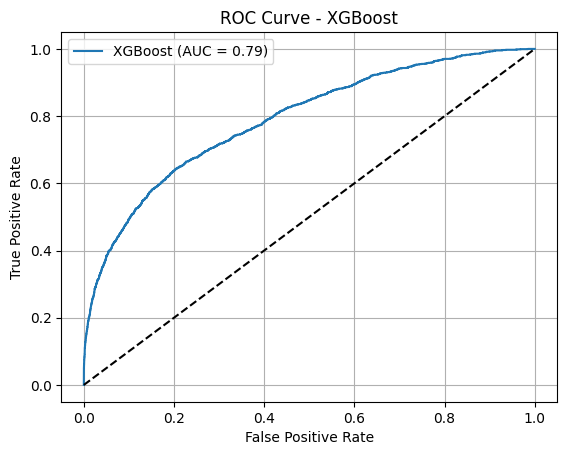

Logistic Regression Classification Report (Threshold = 0.5):
               precision    recall  f1-score   support

           0       0.94      0.62      0.75     17882
           1       0.11      0.56      0.19      1549

    accuracy                           0.61     19431
   macro avg       0.53      0.59      0.47     19431
weighted avg       0.88      0.61      0.70     19431



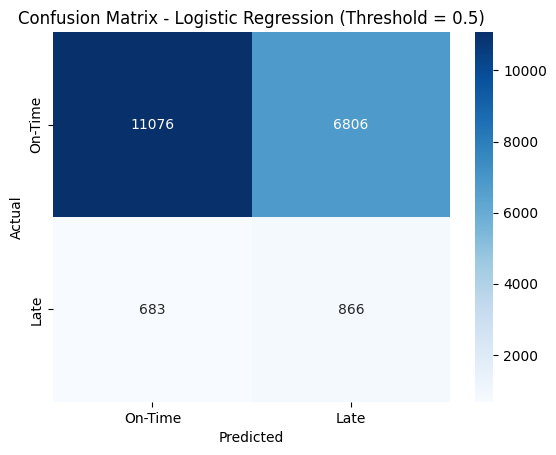

Logistic Regression AUC: 0.6240


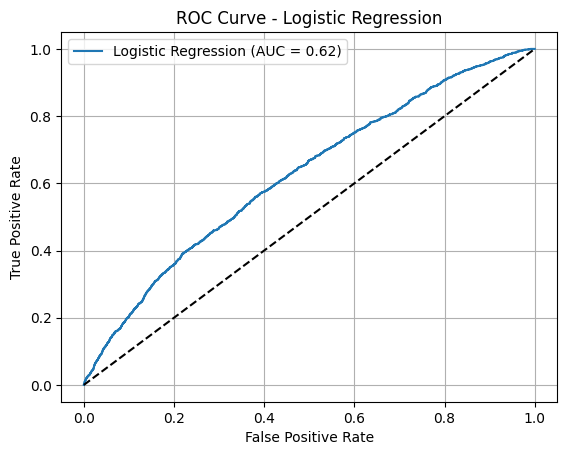

In [107]:
def evaluate_model(model, X_test, y_test, title="Model", threshold=0.5):
    # Get predicted probabilities
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Apply custom threshold
    y_pred = (y_probs >= threshold).astype(int)
    
    # Print classification report
    print(f"{title} Classification Report (Threshold = {threshold}):\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['On-Time', 'Late'], yticklabels=['On-Time', 'Late'])
    plt.title(f"Confusion Matrix - {title} (Threshold = {threshold})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = auc(fpr, tpr)
    print(f"{title} AUC: {auc_score:.4f}")
    plt.plot(fpr, tpr, label=f'{title} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {title}")
    plt.legend()
    plt.grid(True)
    plt.show()

evaluate_model(best_rf, X_test_scaled, y_test, title="Random Forest")
evaluate_model(best_xgb, X_test_scaled, y_test, title="XGBoost")
evaluate_model(best_log, X_test_scaled, y_test, title="Logistic Regression")

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_multiple_splits(models_dict, X, y, test_sizes=[0.2, 0.3], random_state=42):

    results = []

    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, stratify=y, random_state=random_state)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        for name, model in models_dict.items():
            # Clone the model to retrain on current split
            from sklearn.base import clone
            clf = clone(model)
            clf.fit(X_train_scaled, y_train)

            y_pred = clf.predict(X_test_scaled)
            y_probs = clf.predict_proba(X_test_scaled)[:, 1] if hasattr(clf, "predict_proba") else None

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, zero_division=0)
            recall = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            roc_auc = roc_auc_score(y_test, y_probs) if y_probs is not None else None

            results.append({
                'Model': name,
                'Test Size': test_size,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1 Score': f1,
                'ROC AUC': roc_auc
            })

    return pd.DataFrame(results).round(4)


model_dict = {
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "Logistic Regression": best_log
}

X = df_cleaned[feature_cols].dropna()
y = df_cleaned.loc[X.index, 'is_late']

summary_all_splits = evaluate_multiple_splits(model_dict, X, y, test_sizes=[0.2, 0.3])

In [109]:
summary_all_splits

,Model,Test Size,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Random Forest,0.2,0.9254,0.7577,0.0949,0.1687,0.8026
1,XGBoost,0.2,0.9027,0.3894,0.3886,0.3890,0.7898
2,Logistic Regression,0.2,0.6146,0.1129,0.5591,0.1878,0.6240
3,Random Forest,0.3,0.9247,0.7260,0.0878,0.1567,0.7945
4,XGBoost,0.3,0.9031,0.3845,0.3599,0.3718,0.7883
5,Logistic Regression,0.3,0.6180,0.1130,0.5540,0.1878,0.6255


### Ensembling

Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     17882
           1       0.55      0.26      0.35      1549

    accuracy                           0.92     19431
   macro avg       0.74      0.62      0.65     19431
weighted avg       0.91      0.92      0.91     19431



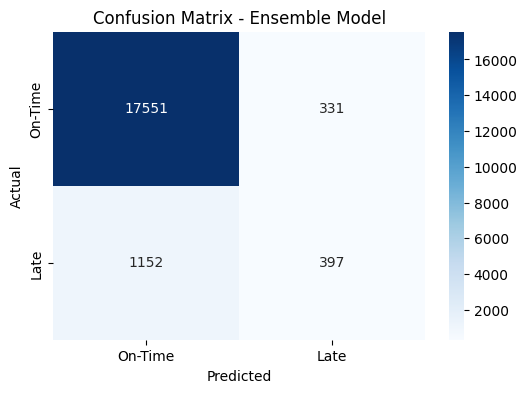

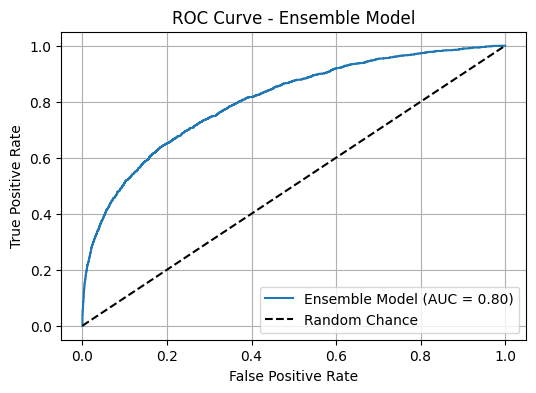

In [120]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Create the ensemble model
ensemble_model = VotingClassifier(
    estimators=[
        ('Random Forest', best_rf),
        ('XGBoost', best_xgb),
    ],
    voting='soft'  # Use 'soft' voting to average probabilities
)

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_ensemble = ensemble_model.predict(X_test_scaled)
y_probs_ensemble = ensemble_model.predict_proba(X_test_scaled)[:, 1]

# Classification report
print("Ensemble Model Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['On-Time', 'Late'], yticklabels=['On-Time', 'Late'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs_ensemble)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Ensemble Model (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ensemble Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()